In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
path = r'C:\Users\firoj\OneDrive\Desktop\thesis_test\Thesis_test_01\Final_data'
os.chdir(path)

In [3]:
df = pd.read_csv('main_data_with_outlier.csv')
df.head()

,ais_timestamp,vessel_mmsi,vessel_length,lon,lat,distance,speed,destination_lat,destination_lon,remaining_distance,lock_status,water_level_m,sig_m,wave_tp,wind_m/s,sine,cosine,target
0,01.05.2023 07:08,210090000.0,88.0,8.545379,53.56142,0.0,110.0,53.49468,8.504,7909.105180,1.0,5.02,0.3666,356.8,3.5,0.48481,-0.874620,27.0
1,01.05.2023 07:08,210090000.0,88.0,8.545379,53.56142,0.0,110.0,53.49468,8.504,7909.105180,1.0,5.02,0.3666,356.8,3.5,0.48481,-0.874620,27.0
2,01.05.2023 07:08,210090000.0,88.0,8.545379,53.56142,0.0,110.0,53.49468,8.504,7909.105180,1.0,5.02,0.3666,356.8,3.5,0.48481,-0.874620,27.0
3,01.05.2023 07:11,210090000.0,88.0,8.554007,53.55247,1150.0,112.0,53.49468,8.504,7226.372365,1.0,5.06,0.3575,347.8,3.1,0.50000,-0.866025,24.0
4,01.05.2023 07:11,210090000.0,88.0,8.554007,53.55247,1150.0,112.0,53.49468,8.504,7226.372365,1.0,5.06,0.3575,347.8,3.1,0.50000,-0.866025,24.0


In [4]:
print(df.shape)

(243798, 18)


In [5]:
print(df.columns)

Index(['ais_timestamp', 'vessel_mmsi', 'vessel_length', 'lon', 'lat',
       'distance', 'speed', 'destination_lat', 'destination_lon',
       'remaining_distance', 'lock_status', 'water_level_m', 'sig_m',
       'wave_tp', 'wind_m/s', 'sine', 'cosine', 'target'],
      dtype='object')


In [6]:
# Convert ais_timestamp to datetime
df['ais_timestamp'] = pd.to_datetime(df['ais_timestamp'], format='%d.%m.%Y %H:%M')

In [7]:
df.head()

,ais_timestamp,vessel_mmsi,vessel_length,lon,lat,distance,speed,destination_lat,destination_lon,remaining_distance,lock_status,water_level_m,sig_m,wave_tp,wind_m/s,sine,cosine,target
0,2023-05-01 07:08:00,210090000.0,88.0,8.545379,53.56142,0.0,110.0,53.49468,8.504,7909.105180,1.0,5.02,0.3666,356.8,3.5,0.48481,-0.874620,27.0
1,2023-05-01 07:08:00,210090000.0,88.0,8.545379,53.56142,0.0,110.0,53.49468,8.504,7909.105180,1.0,5.02,0.3666,356.8,3.5,0.48481,-0.874620,27.0
2,2023-05-01 07:08:00,210090000.0,88.0,8.545379,53.56142,0.0,110.0,53.49468,8.504,7909.105180,1.0,5.02,0.3666,356.8,3.5,0.48481,-0.874620,27.0
3,2023-05-01 07:11:00,210090000.0,88.0,8.554007,53.55247,1150.0,112.0,53.49468,8.504,7226.372365,1.0,5.06,0.3575,347.8,3.1,0.50000,-0.866025,24.0
4,2023-05-01 07:11:00,210090000.0,88.0,8.554007,53.55247,1150.0,112.0,53.49468,8.504,7226.372365,1.0,5.06,0.3575,347.8,3.1,0.50000,-0.866025,24.0


In [8]:
df.rename(columns={
    'ais_timestamp'     : 'AIS Timestamp',
    'vessel_mmsi'       : 'Vessel MMSI',
    'vessel_length'     : 'Vessel Length (meter)',
    'lon'               : 'Longitude (degrees)',
    'lat'               : 'Latitude (degrees)',
    'distance'          : 'Distance (meter)',
    'speed'             : 'Speed (knots)',
    'destination_lat'   : 'Destination Latitude (degrees)',
    'destination_lon'   : 'Destination Longitude (degrees)',
    'remaining_distance': 'Remaining Distance (meter)',
    'lock_status'       : 'Lock Status',
    'water_level_m'     : 'Water Level (meter)',
    'sig_m'             : 'Significant Wave Height (meter)',
    'wave_tp'           : 'Wave Period (second)',
    'wind_m/s'          : 'Wind Speed (meter/second)',
    'sine'              : 'Sine',
    'cosine'            : 'Cosine',
    'target'            : 'Target'
}, inplace=True)

In [9]:
df.columns

Index(['AIS Timestamp', 'Vessel MMSI', 'Vessel Length (meter)',
       'Longitude (degrees)', 'Latitude (degrees)', 'Distance (meter)',
       'Speed (knots)', 'Destination Latitude (degrees)',
       'Destination Longitude (degrees)', 'Remaining Distance (meter)',
       'Lock Status', 'Water Level (meter)', 'Significant Wave Height (meter)',
       'Wave Period (second)', 'Wind Speed (meter/second)', 'Sine', 'Cosine',
       'Target'],
      dtype='object')

In [10]:
# List of columns include in the new DataFrame
columns_to_include = ['Vessel Length (meter)', 
                      'Longitude (degrees)', 
                      'Latitude (degrees)', 
                      'Distance (meter)', 
                      'Speed (knots)', 
                      'Destination Latitude (degrees)', 
                      'Destination Longitude (degrees)',
                      'Remaining Distance (meter)',
                      'Water Level (meter)',
                      'Significant Wave Height (meter)',
                      'Wave Period (second)',
                      'Wind Speed (meter/second)']

# Creating the new DataFrame with the selected columns
updated_df = df[columns_to_include]

In [11]:
updated_df.shape

(243798, 12)

In [12]:
# Descriptive statistics
desc_stats = updated_df.describe()

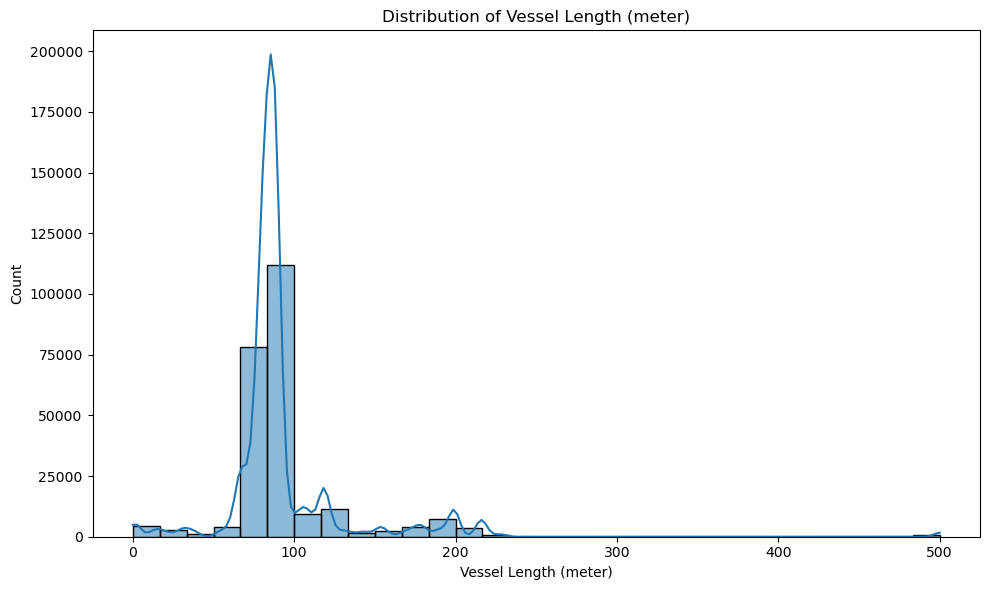

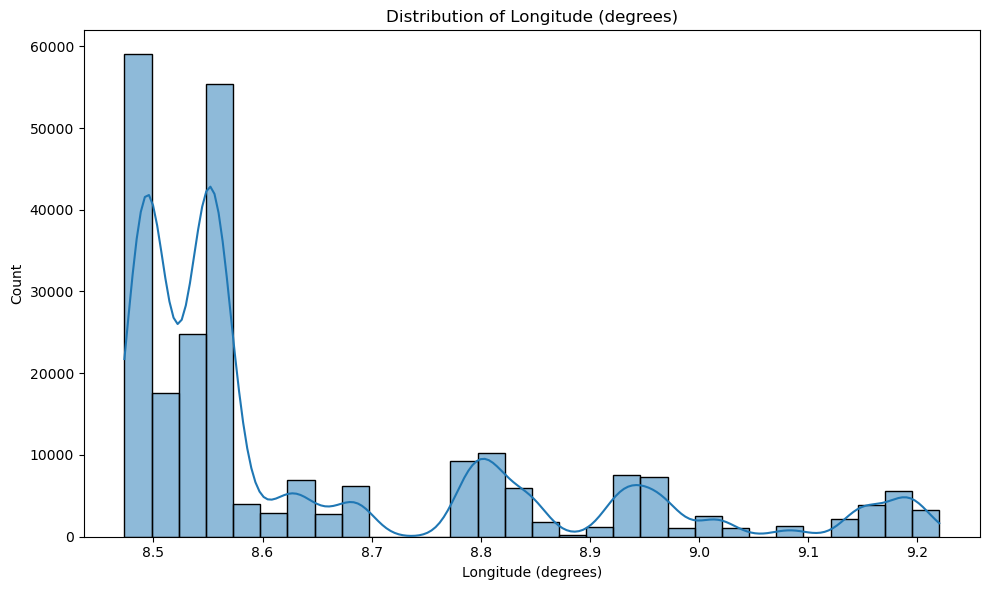

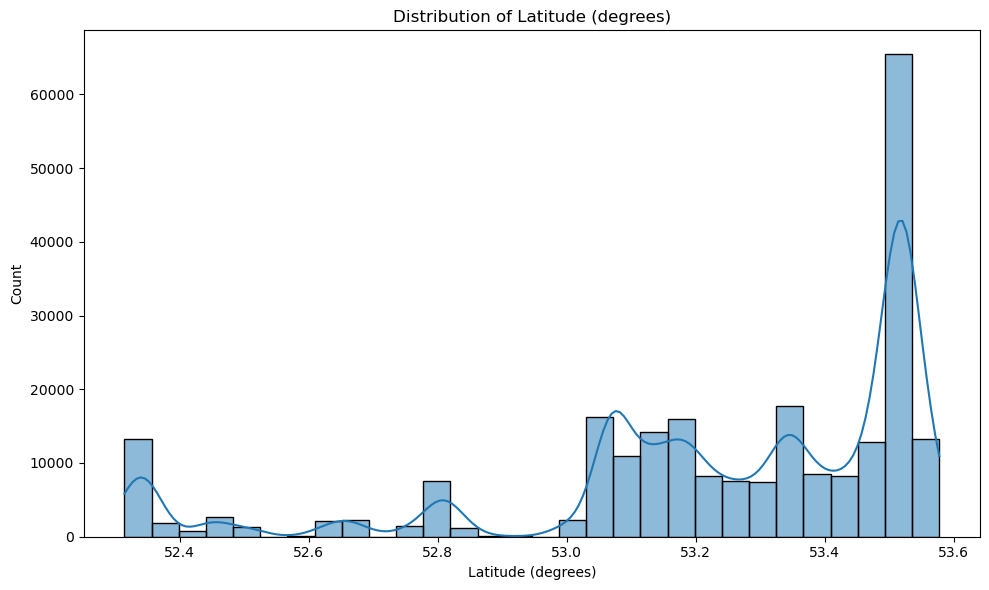

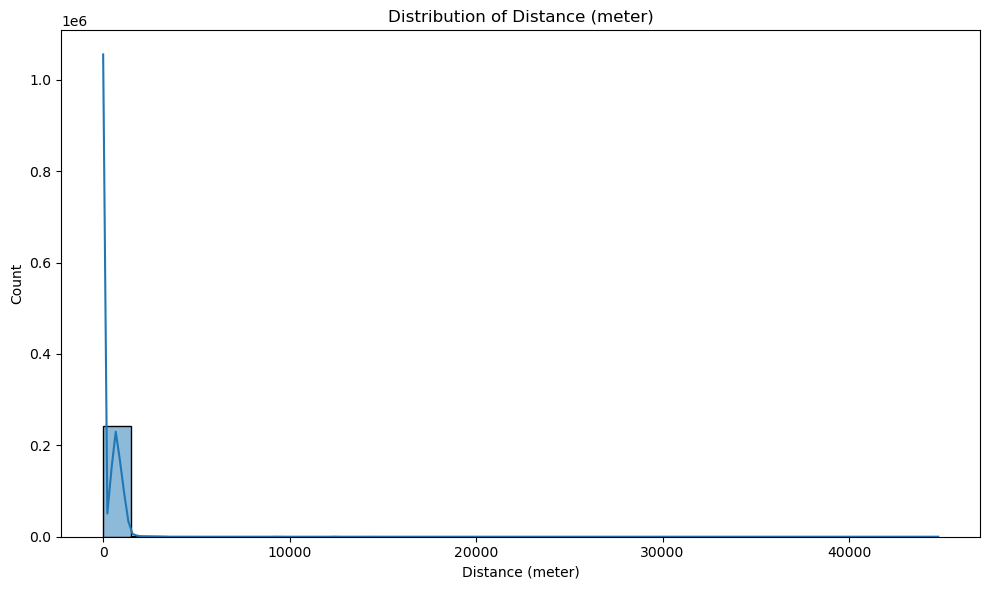

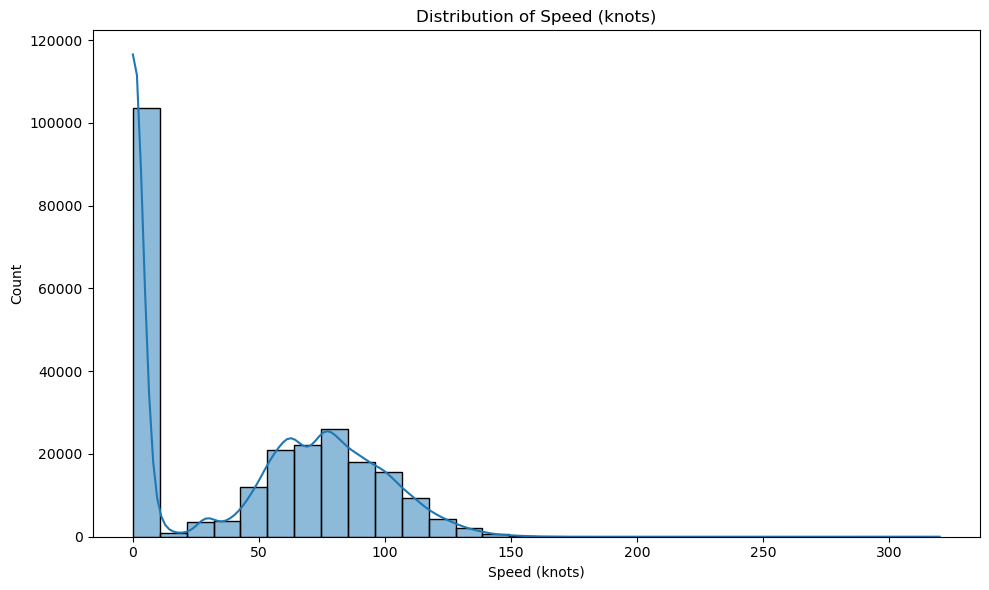

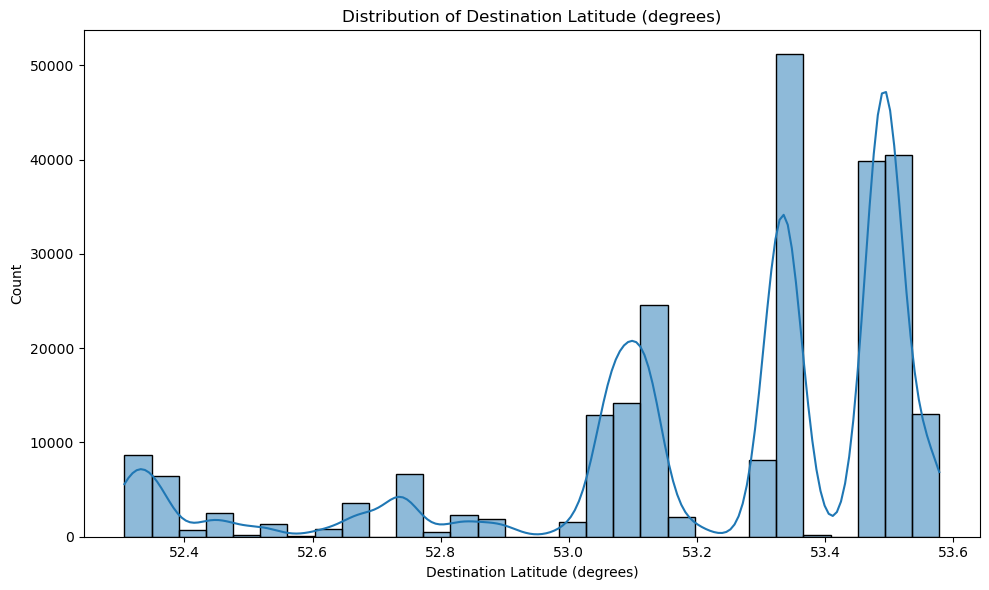

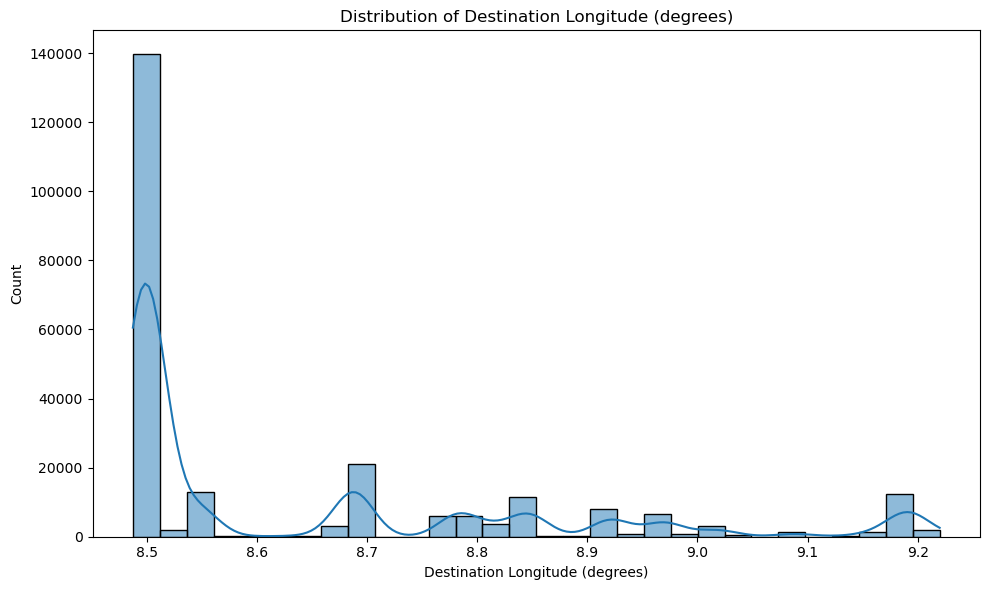

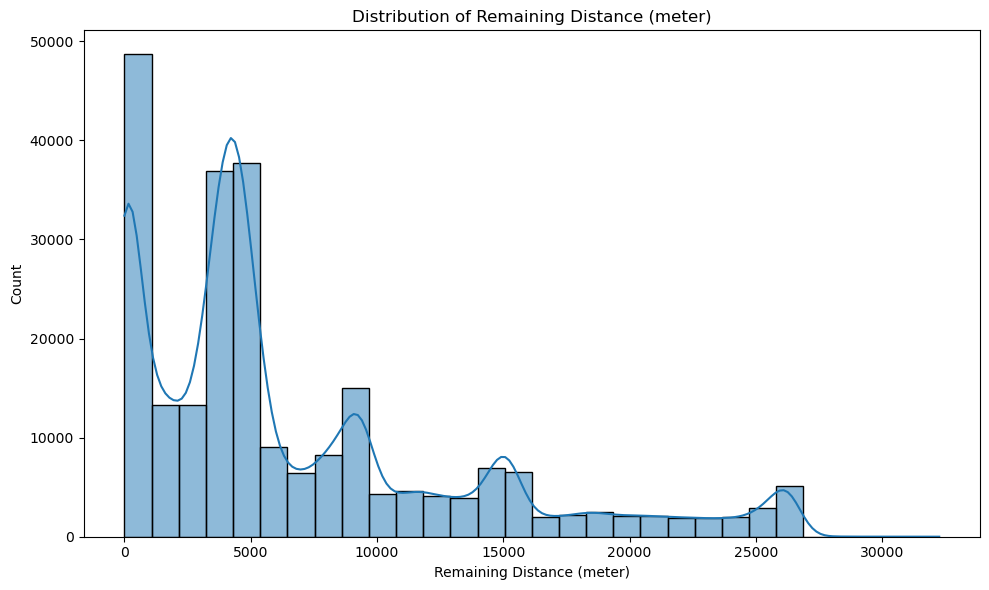

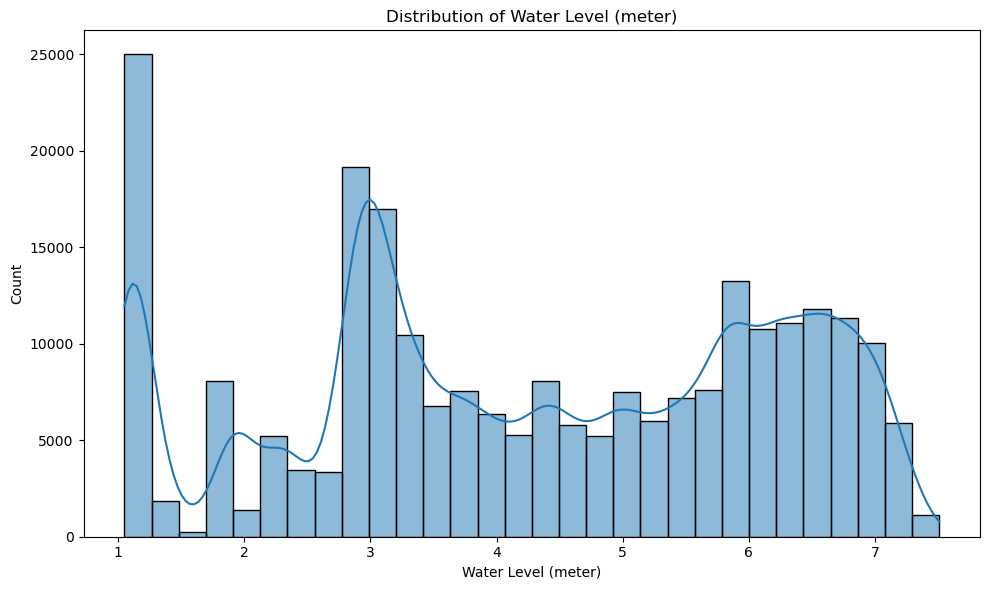

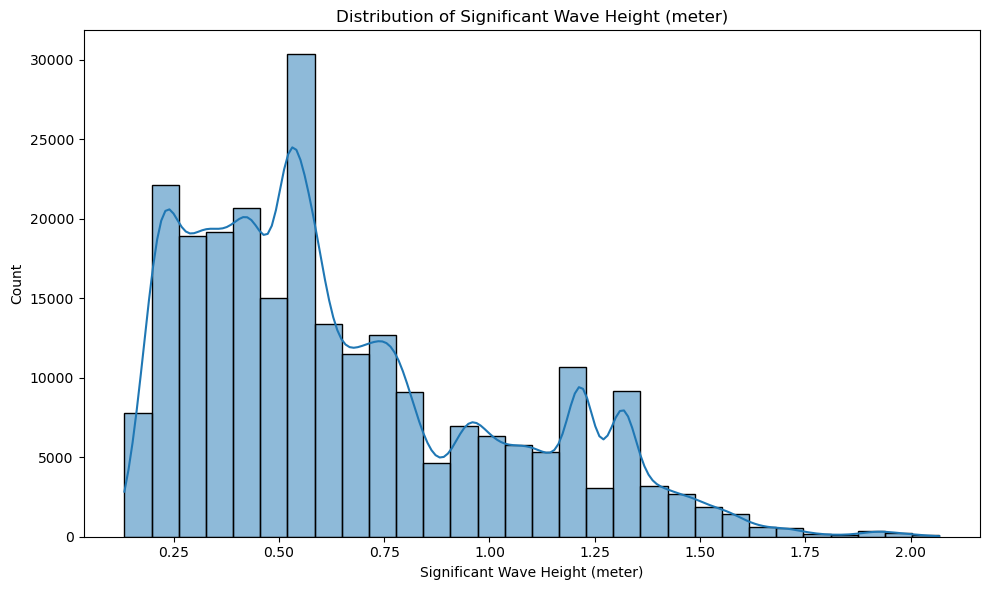

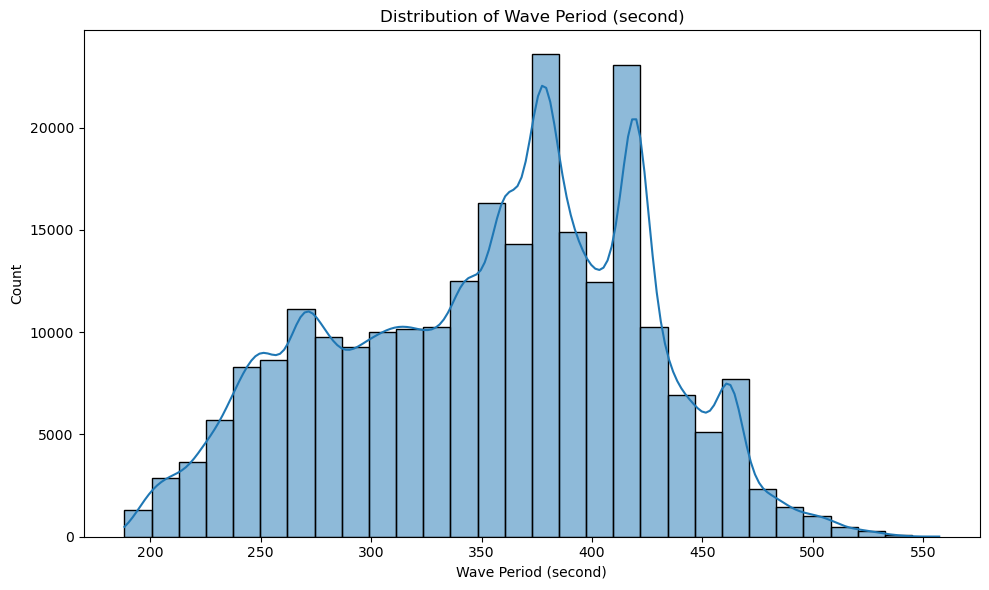

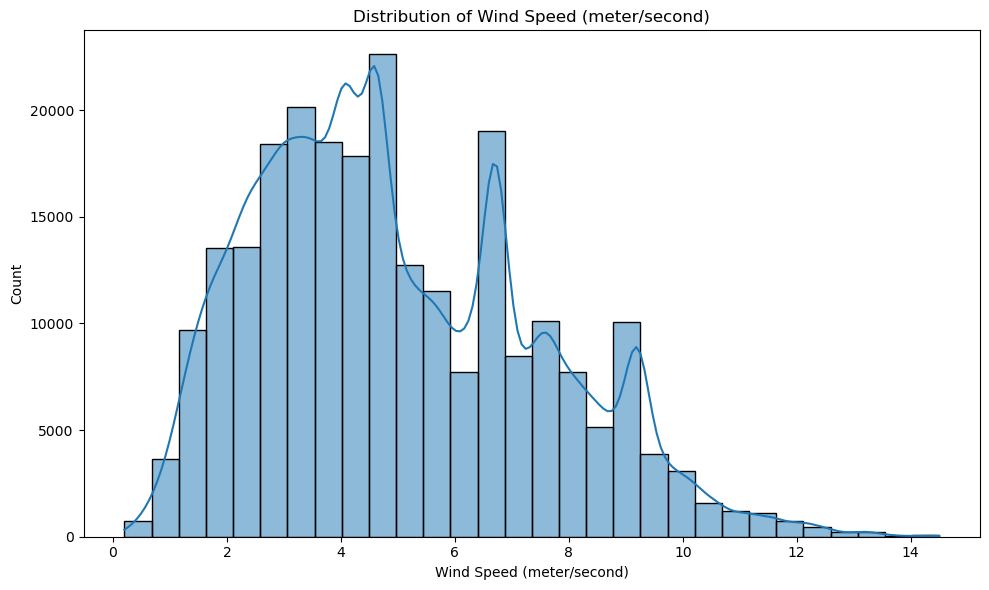

In [13]:
# Assuming num_columns is a list of numerical columns
num_columns = updated_df.select_dtypes(include=['float64', 'int64']).columns

# Create the plots one by one
for col in num_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(updated_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

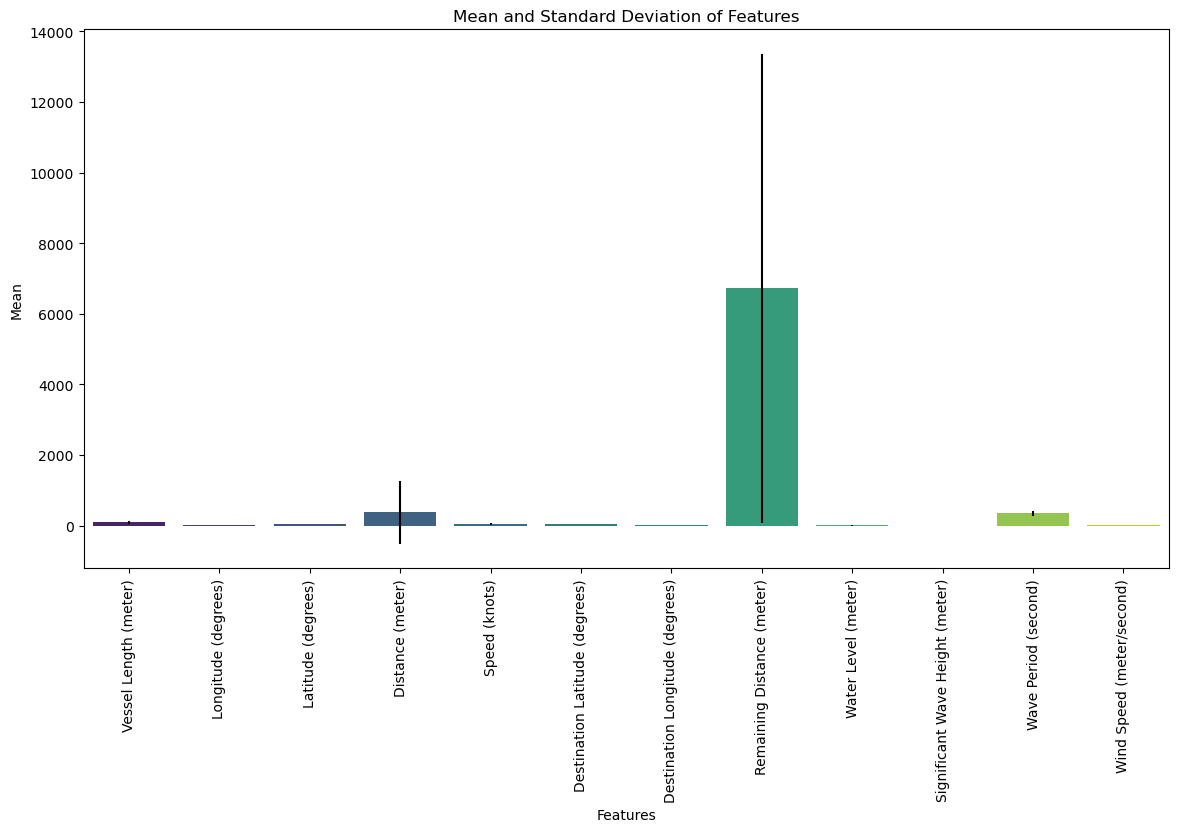

In [14]:
# Bar Plot for mean and standard deviation
mean_std_df = desc_stats.loc[['mean', 'std']].transpose().reset_index()
mean_std_df.columns = ['Feature', 'Mean', 'Std']

plt.figure(figsize=(14, 7))
sns.barplot(x='Feature', y='Mean', yerr=mean_std_df['Std'], data=mean_std_df, palette='viridis')
plt.title('Mean and Standard Deviation of Features')
plt.xlabel('Features')
plt.ylabel('Mean')
plt.xticks(rotation=90)
plt.show()

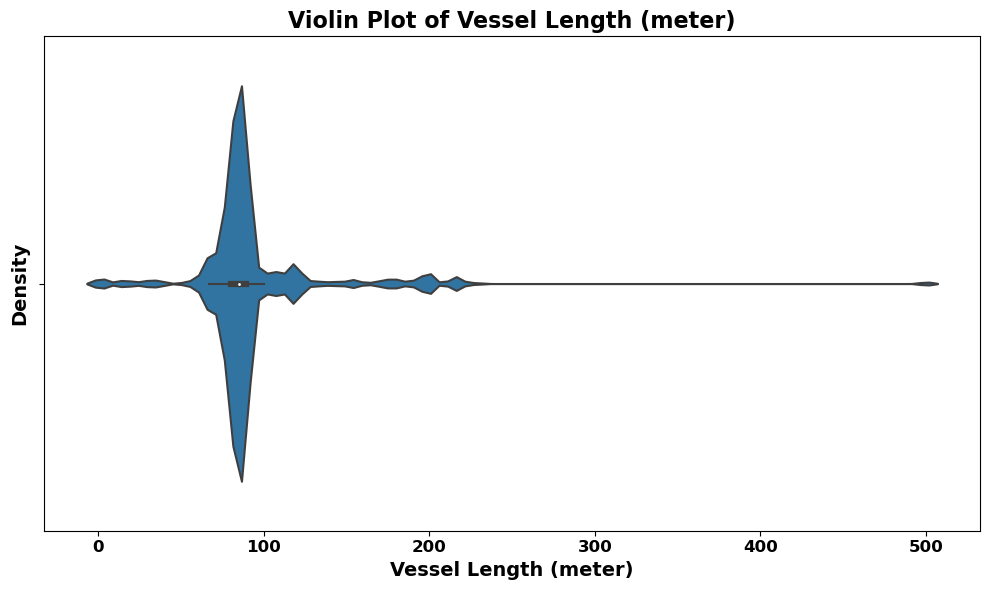

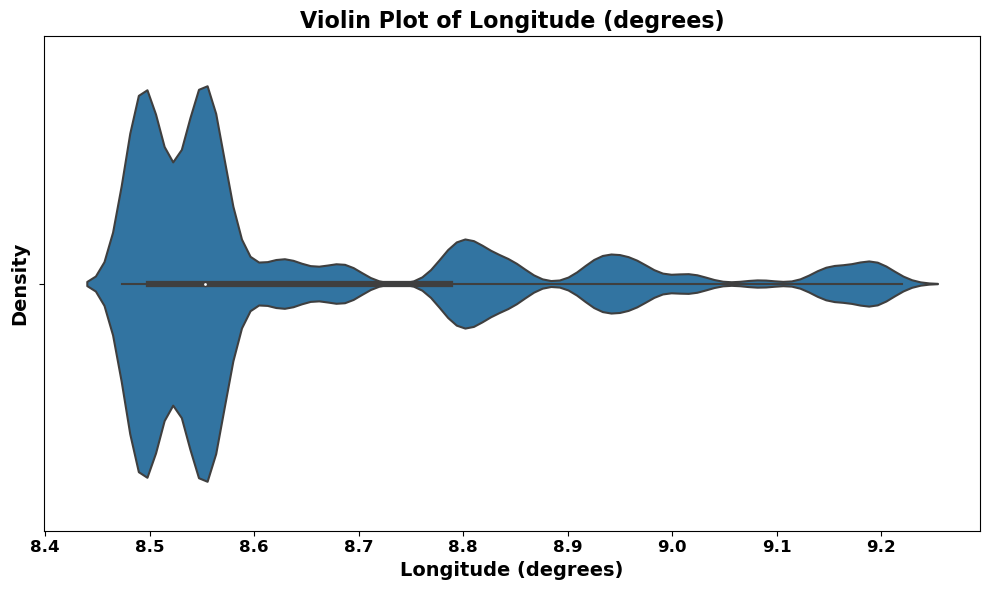

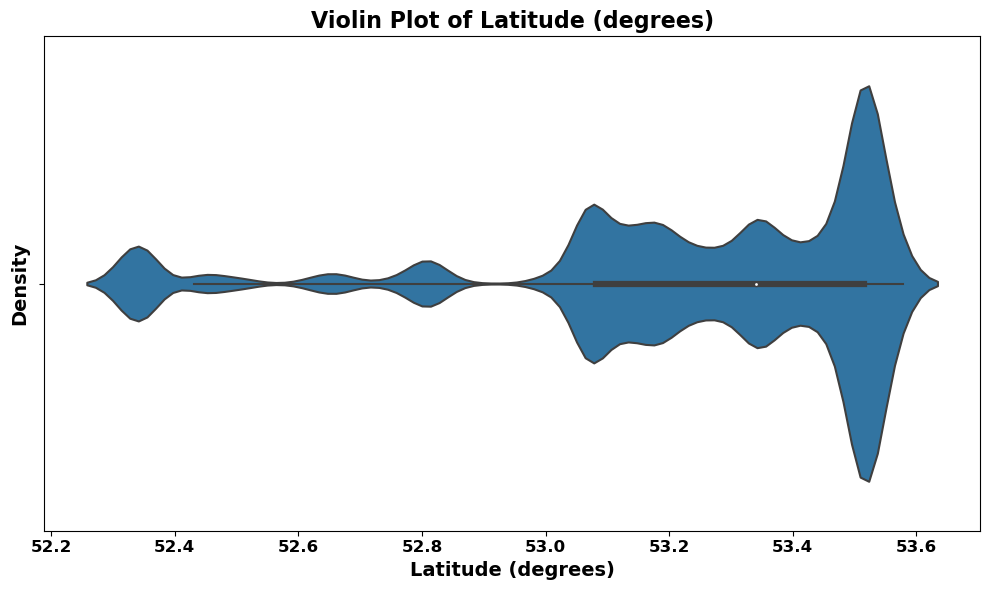

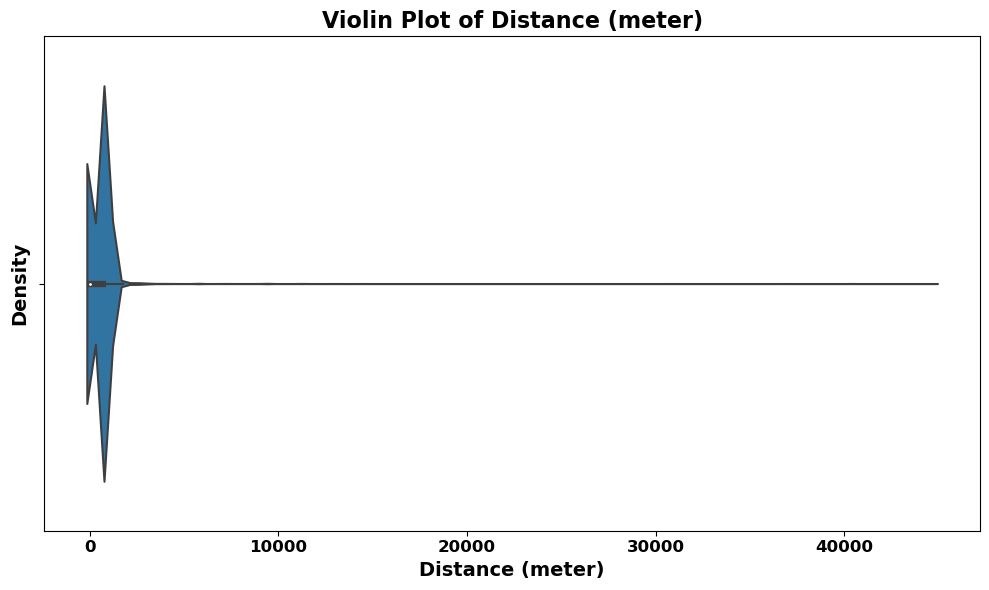

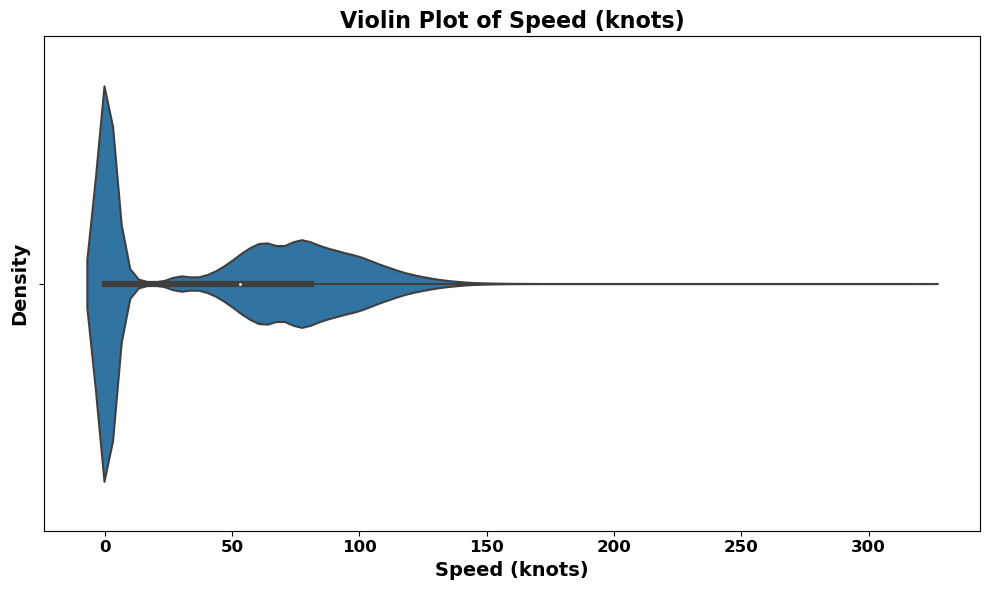

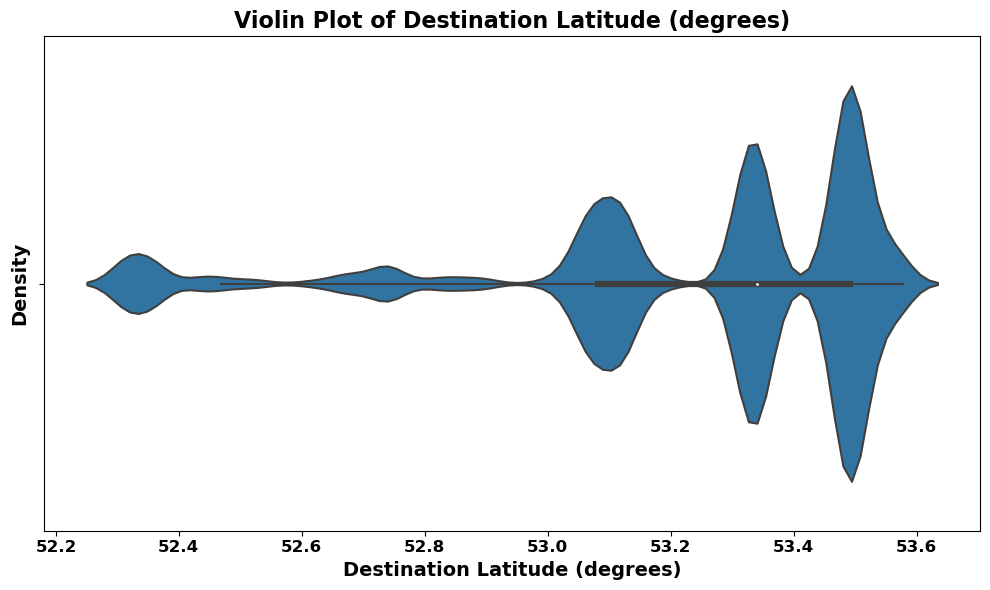

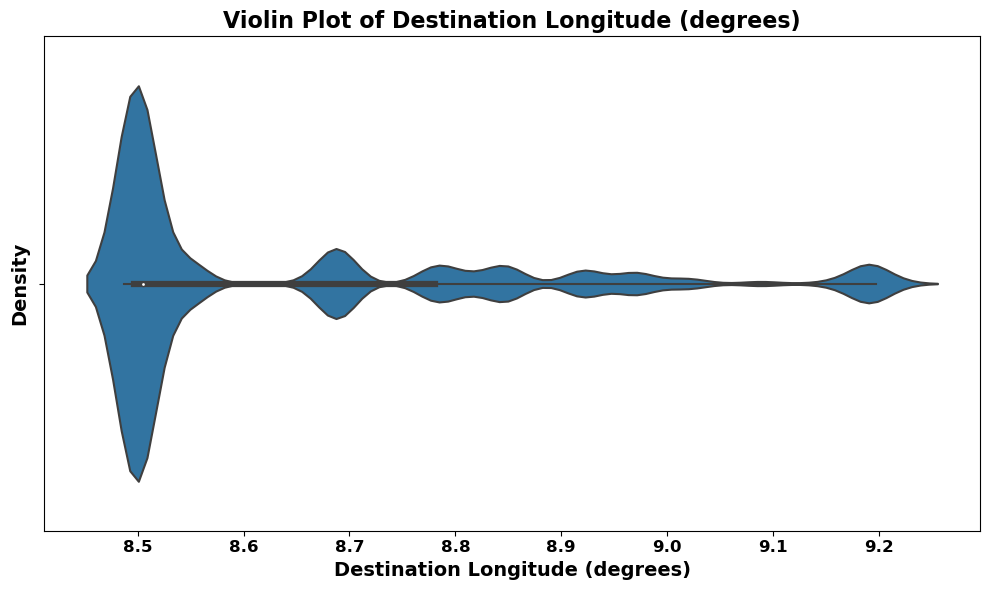

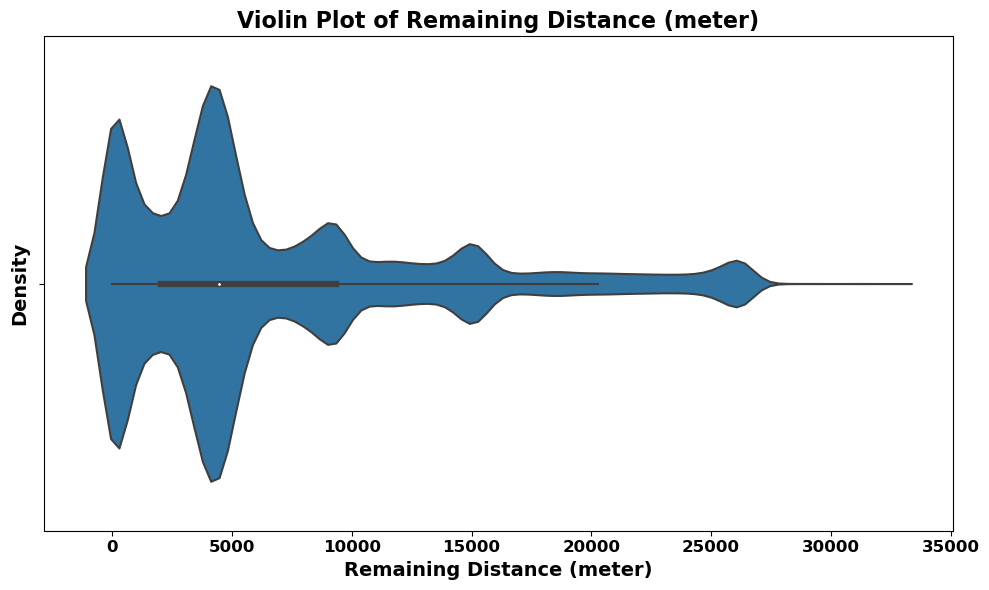

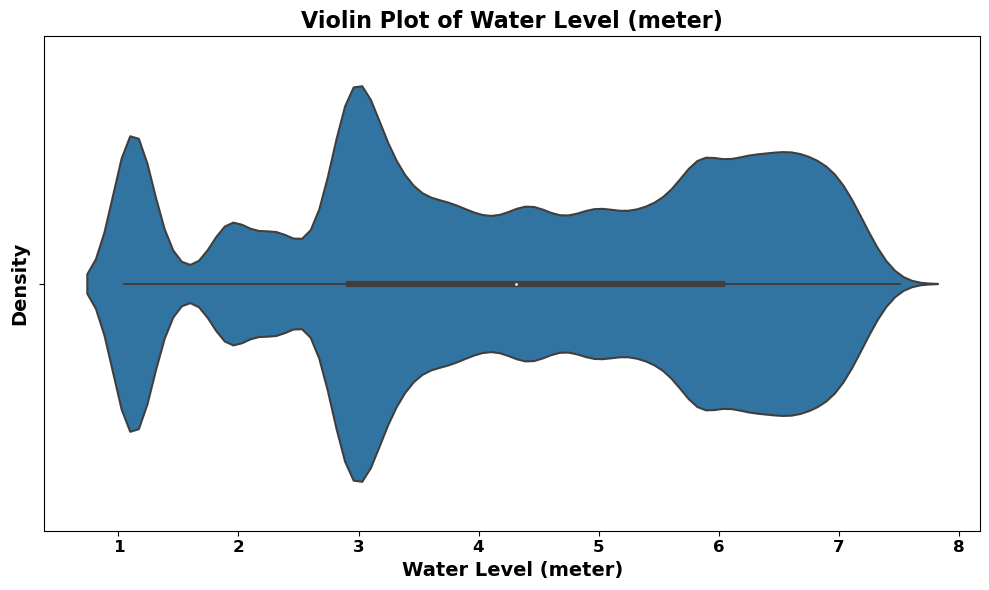

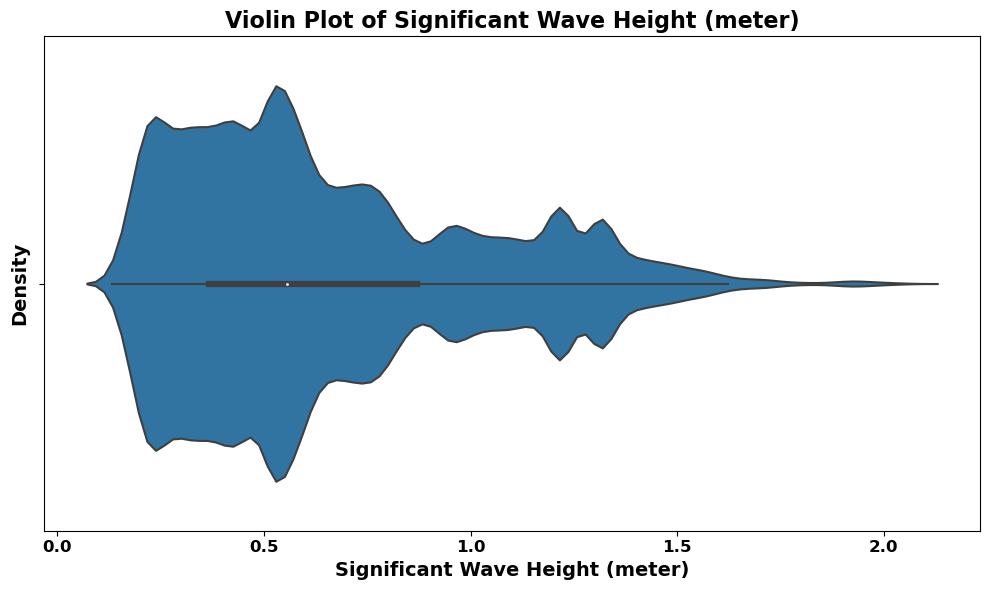

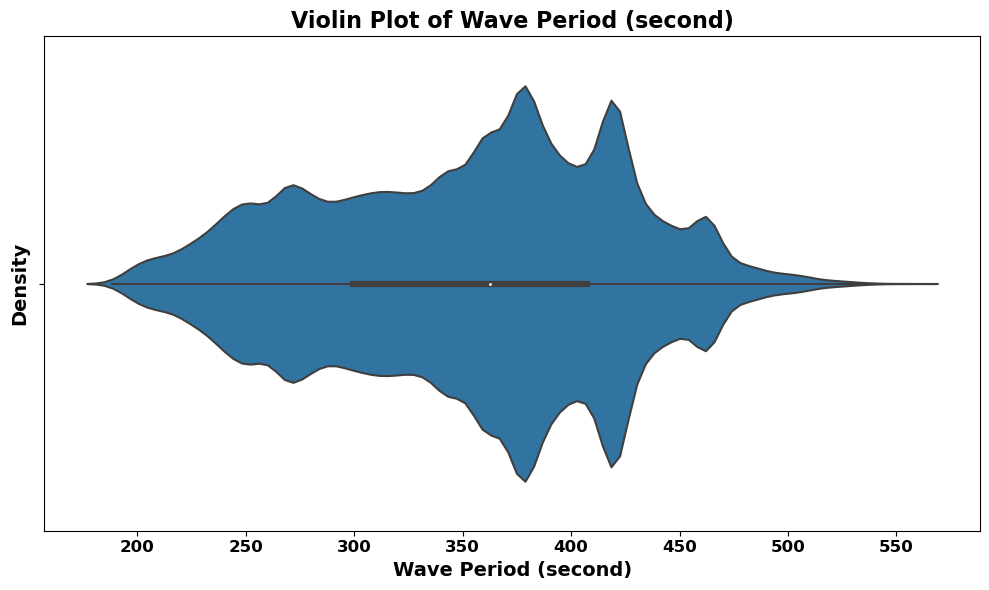

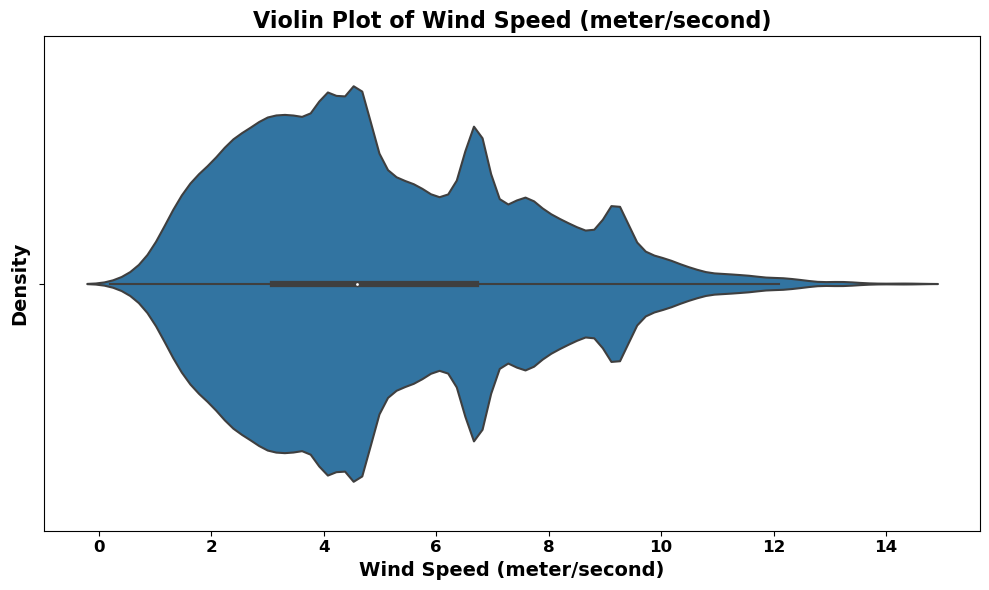

In [27]:
# Create the violin plots one by one
for col in num_columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=updated_df, x=col)
    plt.title(f'Violin Plot of {col}', fontsize=16, fontweight='bold')  # Larger and bold title
    plt.xlabel(col, fontsize=14, fontweight='bold')  # Larger and bold x-axis label
    plt.ylabel('Density', fontsize=14, fontweight='bold')  # Larger and bold y-axis label (if needed)
    plt.xticks(fontsize=12, fontweight='bold')  # Larger and bold x-axis tick values
    plt.yticks(fontsize=12, fontweight='bold')  # Larger and bold y-axis tick values
    plt.tight_layout()
    plt.show()

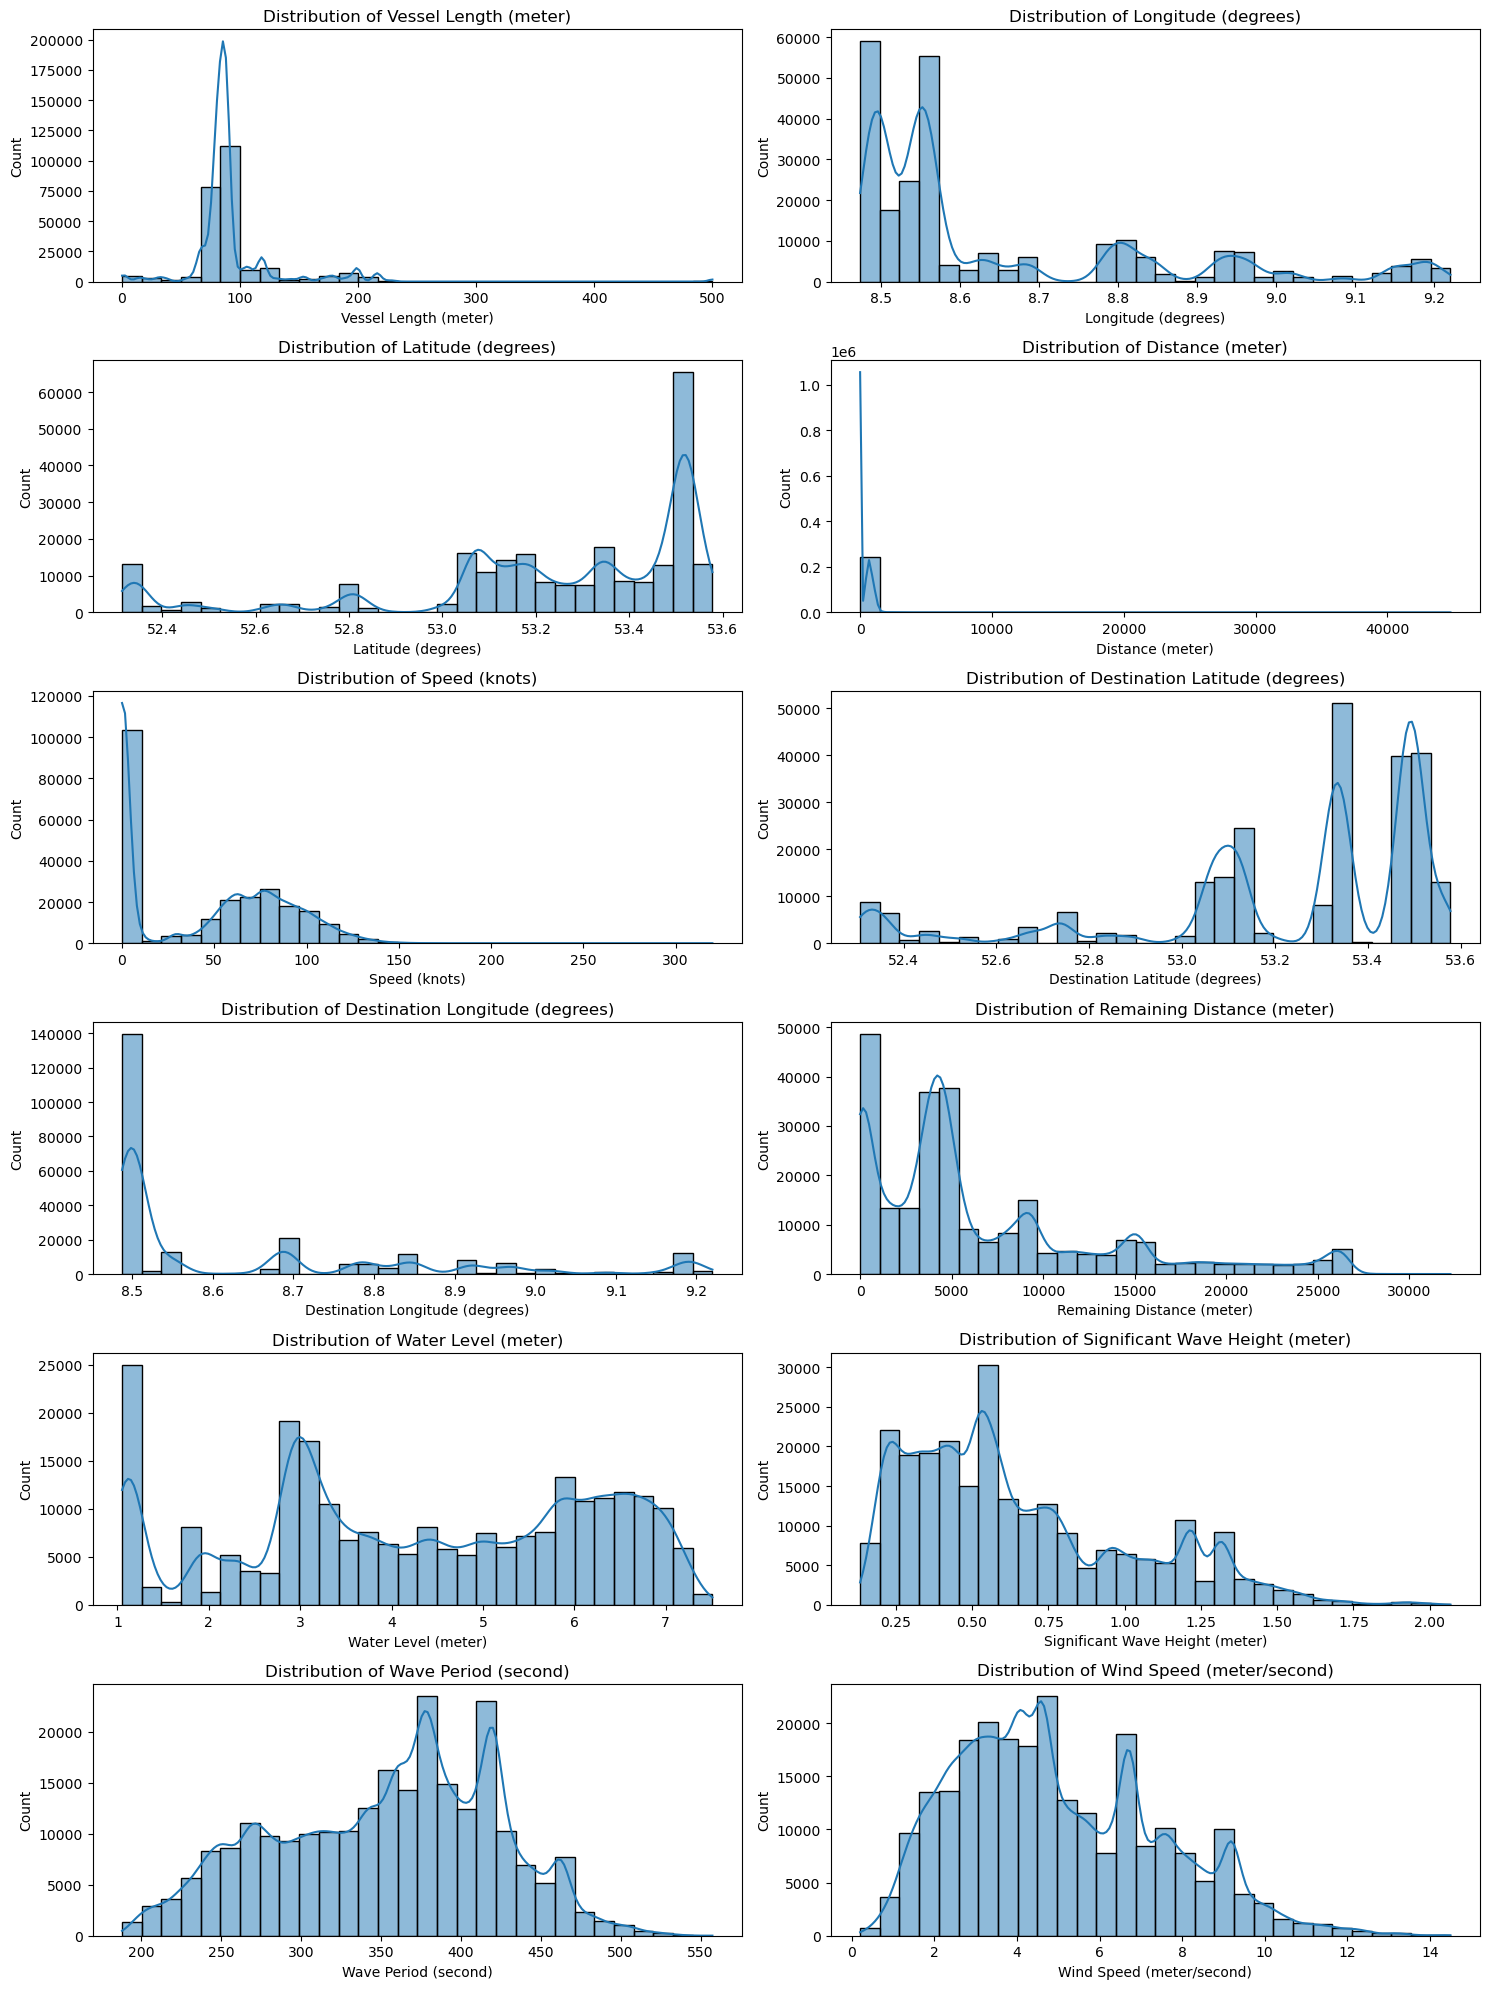

In [16]:
# Histograms for distribution of numerical variables
num_columns = updated_df.select_dtypes(include=['float64', 'int64']).columns

# Set up the matplotlib figure
plt.figure(figsize=(15, 20))
for i, col in enumerate(num_columns):
    plt.subplot(6, 2, i + 1)  # 6x2 grid
    sns.histplot(updated_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

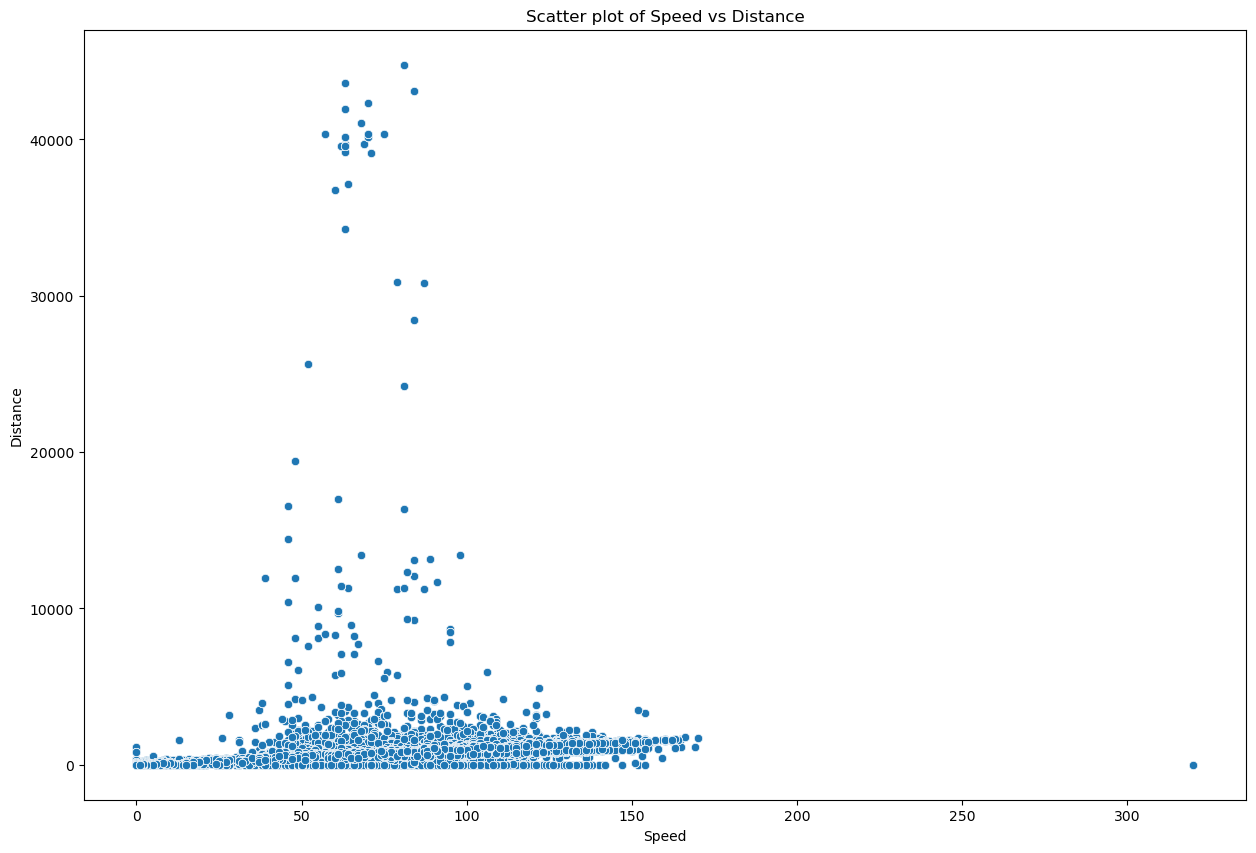

In [17]:
# Scatter plots to visualize relationships between key variables
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Speed (knots)', y='Distance (meter)', data = updated_df)
plt.title('Scatter plot of Speed vs Distance')
plt.xlabel('Speed')
plt.ylabel('Distance')
plt.show()

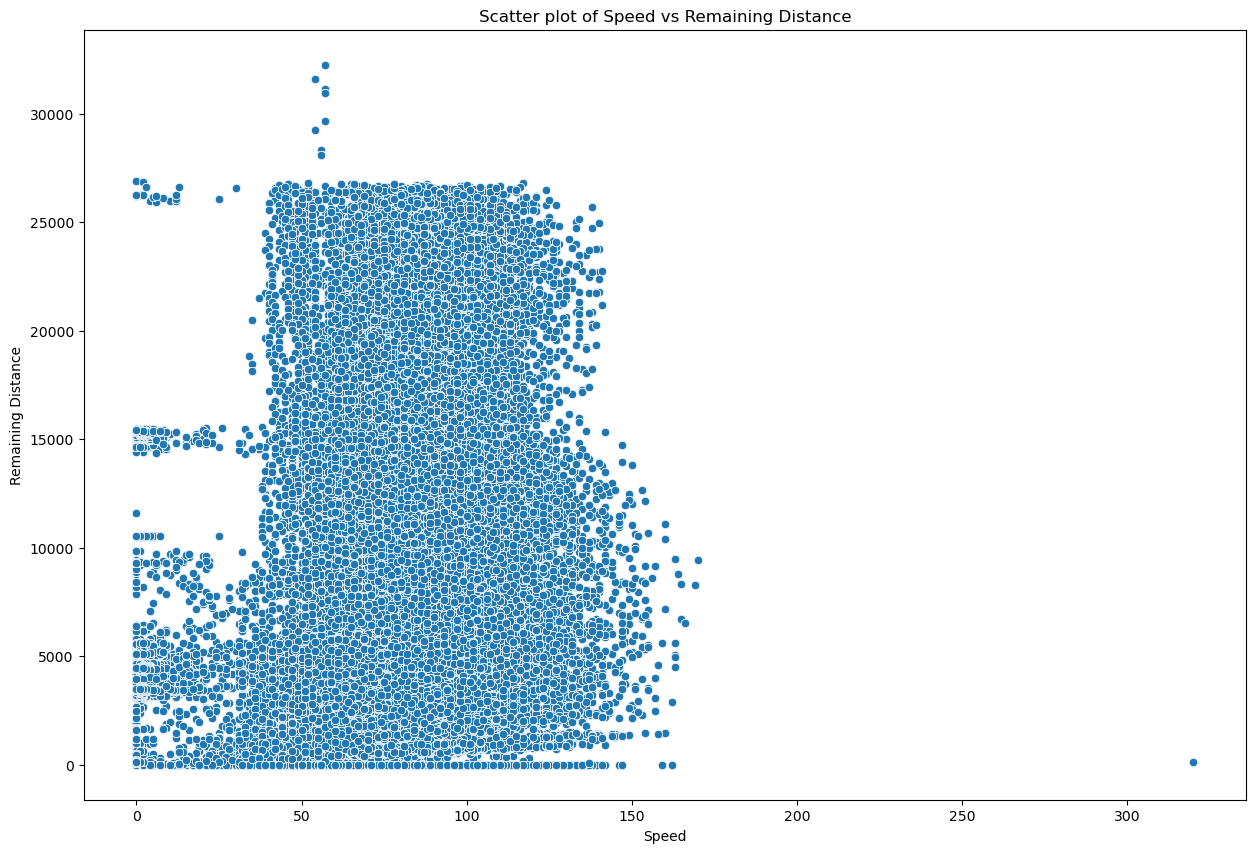

In [18]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Speed (knots)', y = 'Remaining Distance (meter)', data= updated_df)
plt.title('Scatter plot of Speed vs Remaining Distance')
plt.xlabel('Speed')
plt.ylabel('Remaining Distance')
plt.show()

In [19]:
# Line plots to show trends over time
sampled_data = df.sample(n=500, random_state=1)

Text(0, 0.5, 'Speed')

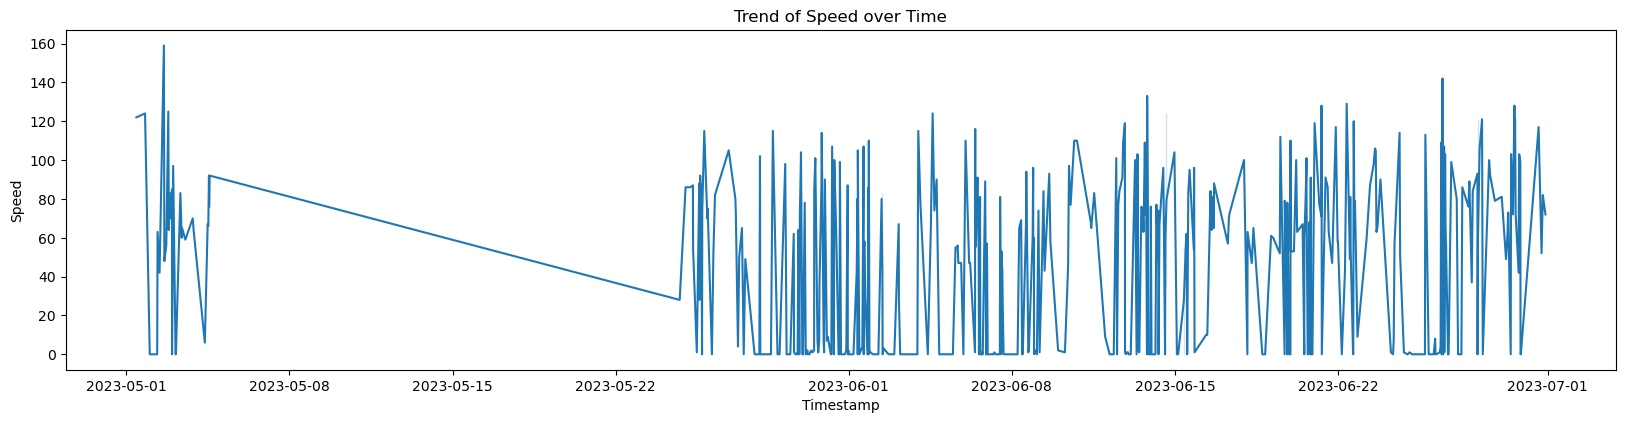

In [20]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 1, 1)
sns.lineplot(x='AIS Timestamp', y='Speed (knots)', data= sampled_data)
plt.title('Trend of Speed over Time')
plt.xlabel('Timestamp')
plt.ylabel('Speed')

Text(0, 0.5, 'Distance')

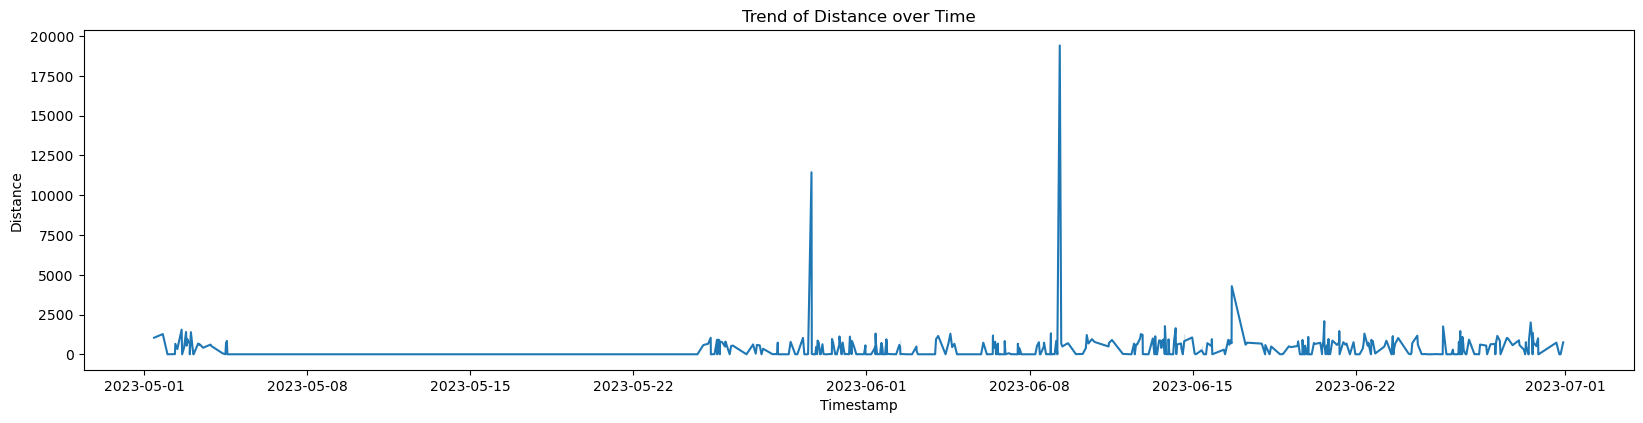

In [21]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 1, 2)
sns.lineplot(x='AIS Timestamp', y='Distance (meter)', data=sampled_data)
plt.title('Trend of Distance over Time')
plt.xlabel('Timestamp')
plt.ylabel('Distance')

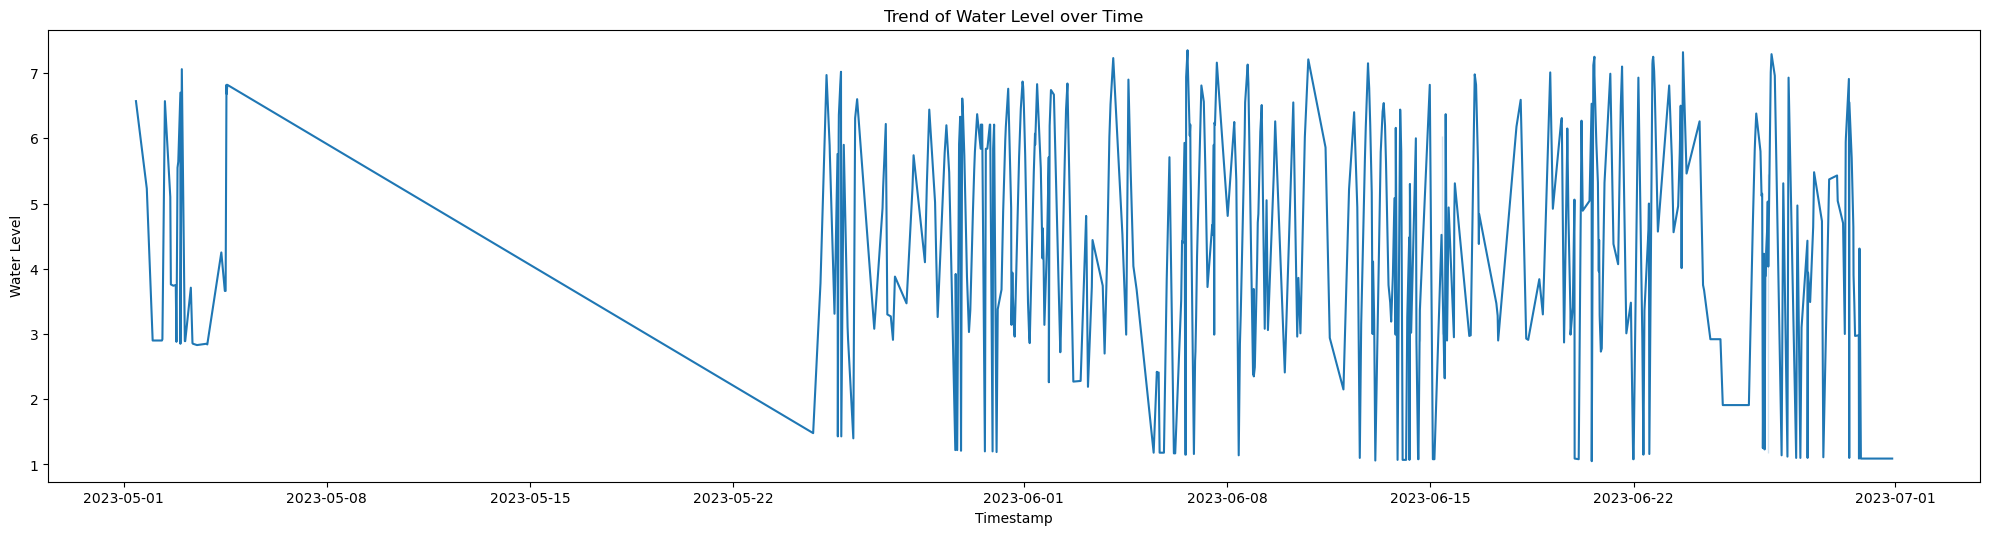

In [22]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 1, 3)
sns.lineplot(x='AIS Timestamp', y='Water Level (meter)', data=sampled_data)
plt.title('Trend of Water Level over Time')
plt.xlabel('Timestamp')
plt.ylabel('Water Level')

plt.tight_layout()
plt.show()

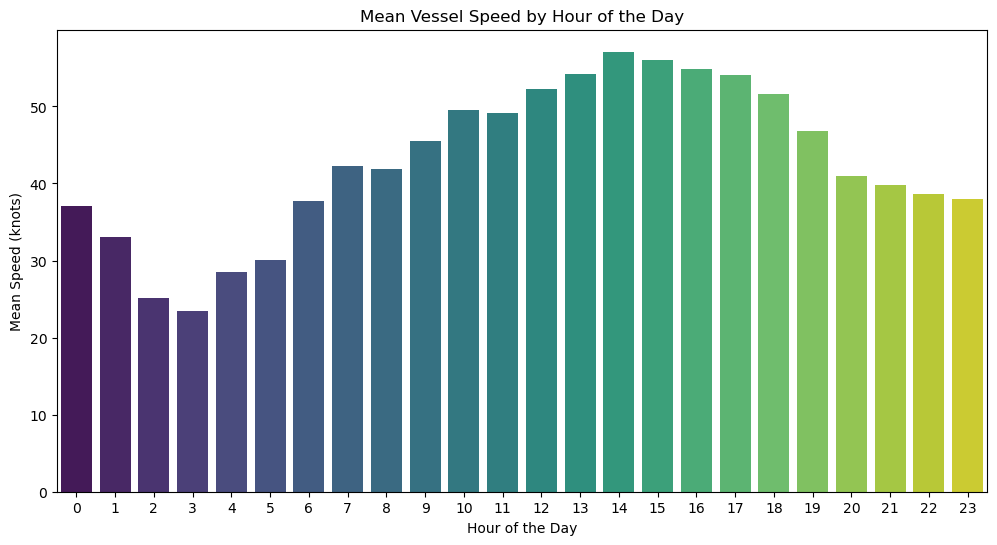

In [23]:
# Calculate mean speed by hour of the day
df['hour'] = df['AIS Timestamp'].dt.hour
mean_speed_by_hour = df.groupby('hour')['Speed (knots)'].mean().reset_index()

# Plot the mean speed by hour
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='Speed (knots)', data=mean_speed_by_hour, palette='viridis')
plt.title('Mean Vessel Speed by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Speed (knots)')
plt.show()

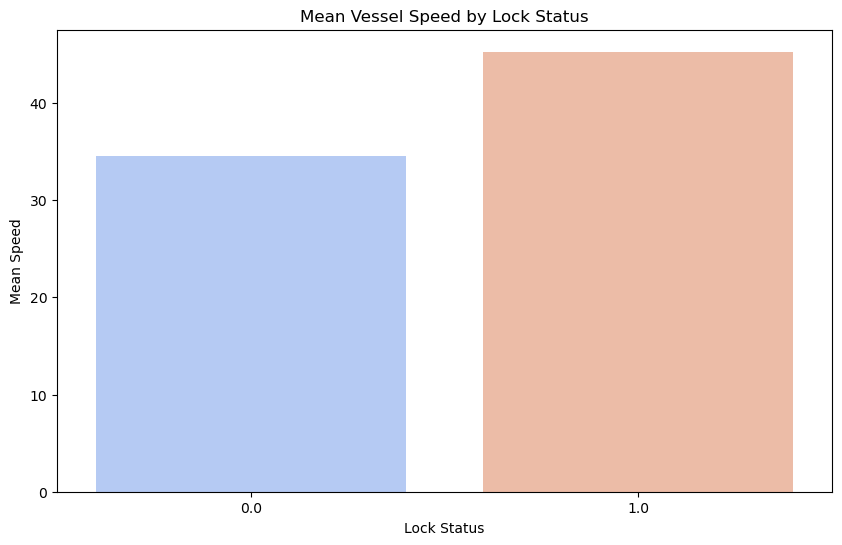

In [24]:
# Calculate mean speed by lock status
mean_speed_by_lock_status = df.groupby('Lock Status')['Speed (knots)'].mean().reset_index()

# Plot the mean speed by lock status
plt.figure(figsize=(10, 6))
sns.barplot(x='Lock Status', y='Speed (knots)', data=mean_speed_by_lock_status, palette='coolwarm')
plt.title('Mean Vessel Speed by Lock Status')
plt.xlabel('Lock Status')
plt.ylabel('Mean Speed')
plt.show()

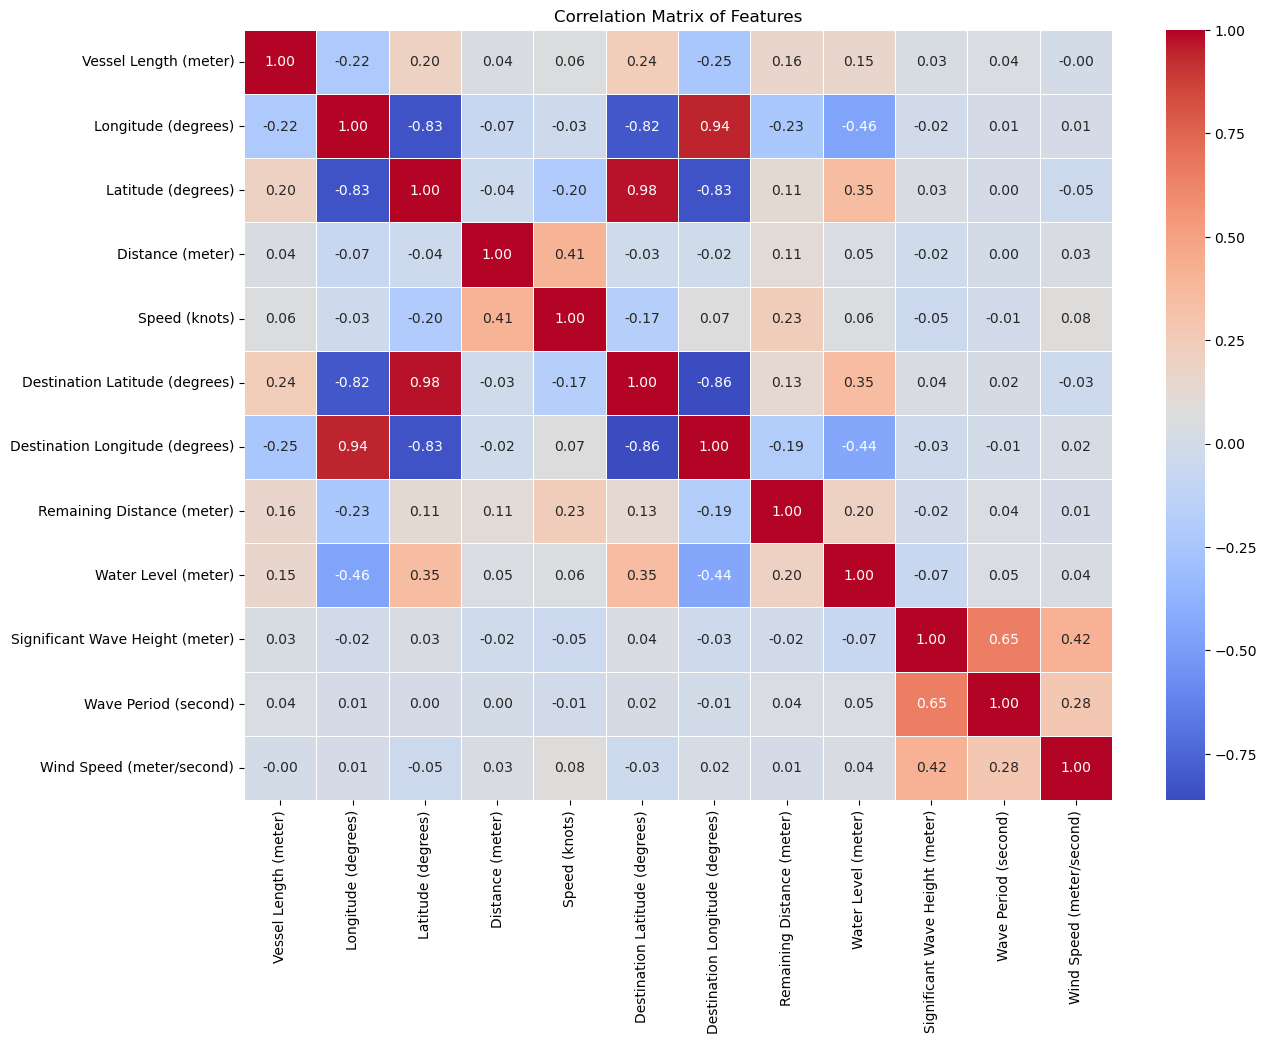

In [25]:
# Calculate the correlation matrix
correlation_matrix = updated_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

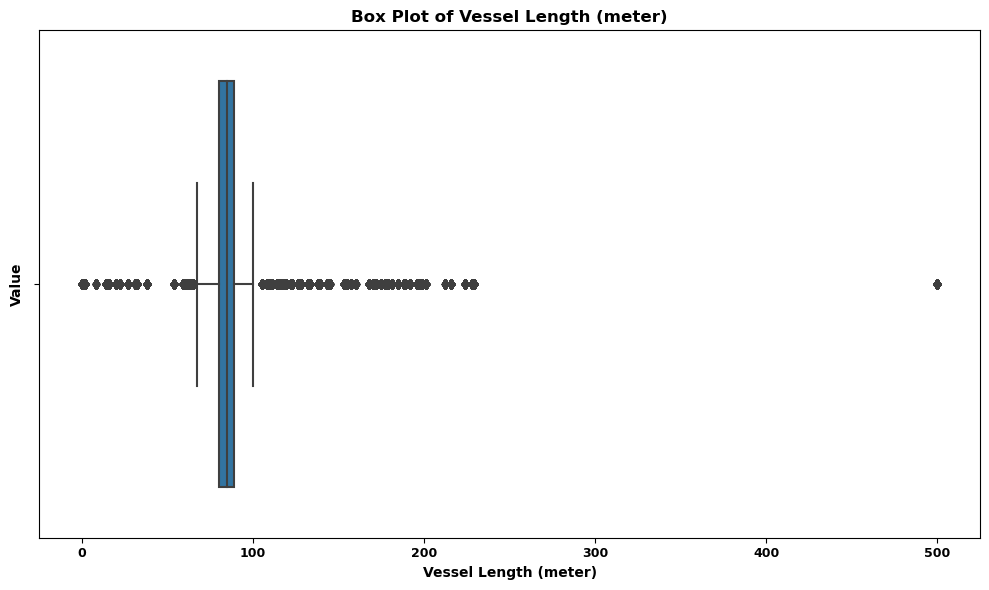

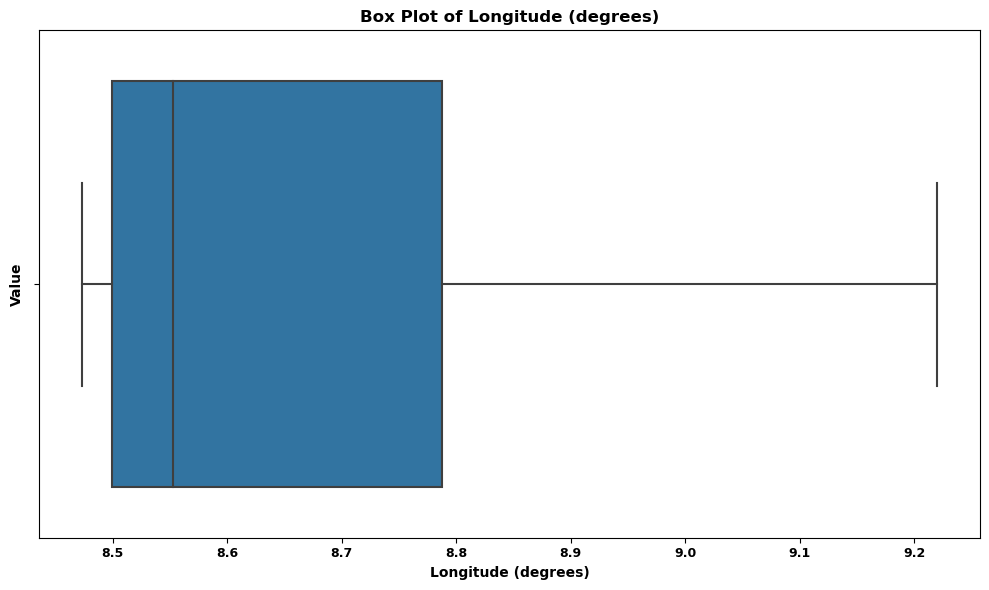

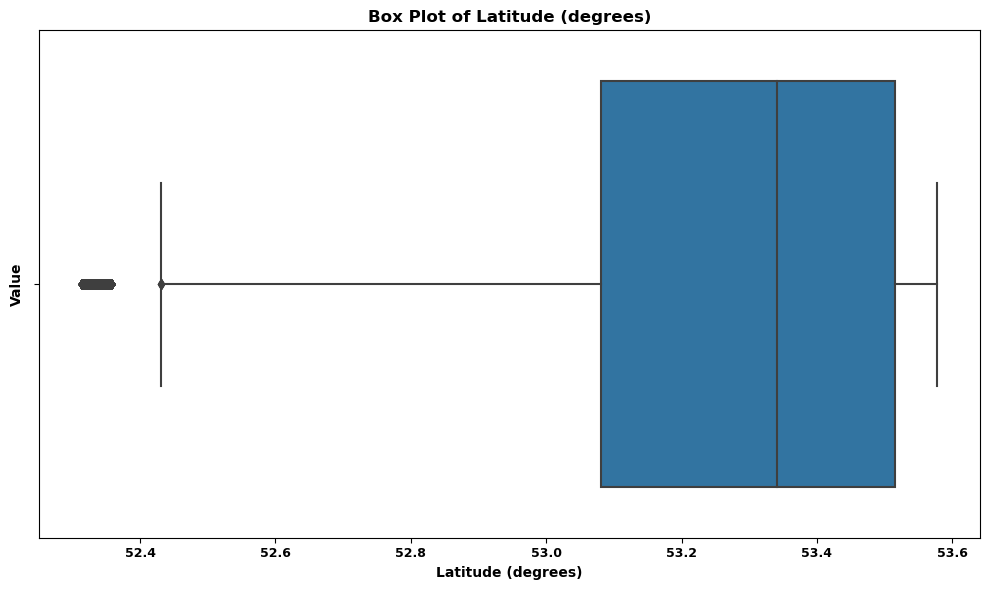

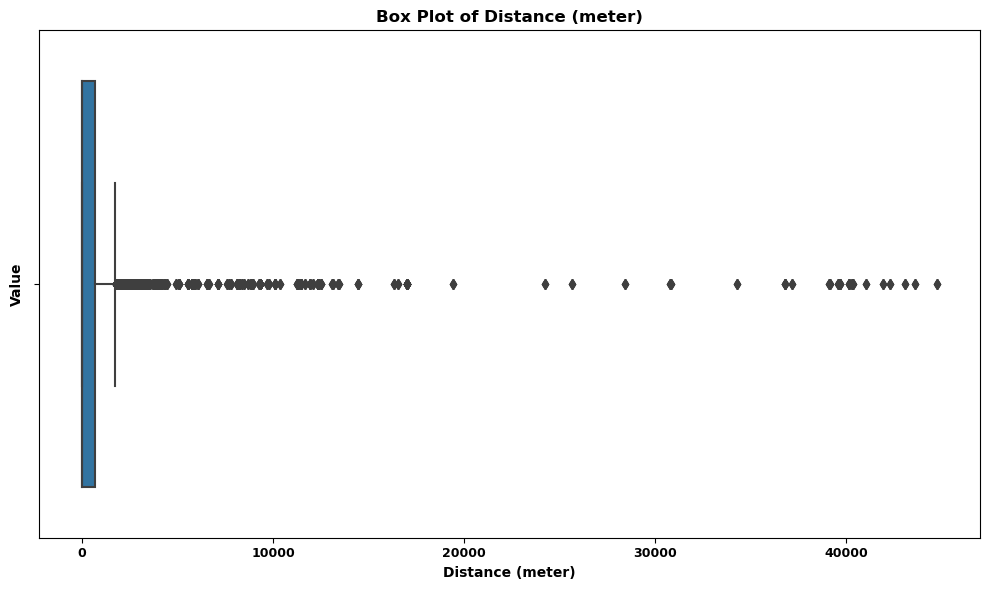

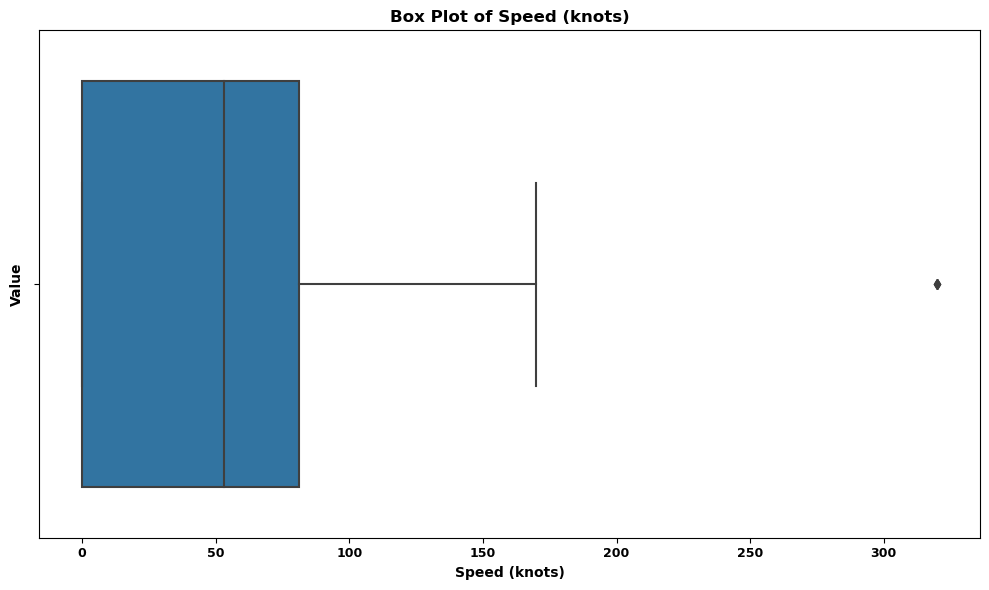

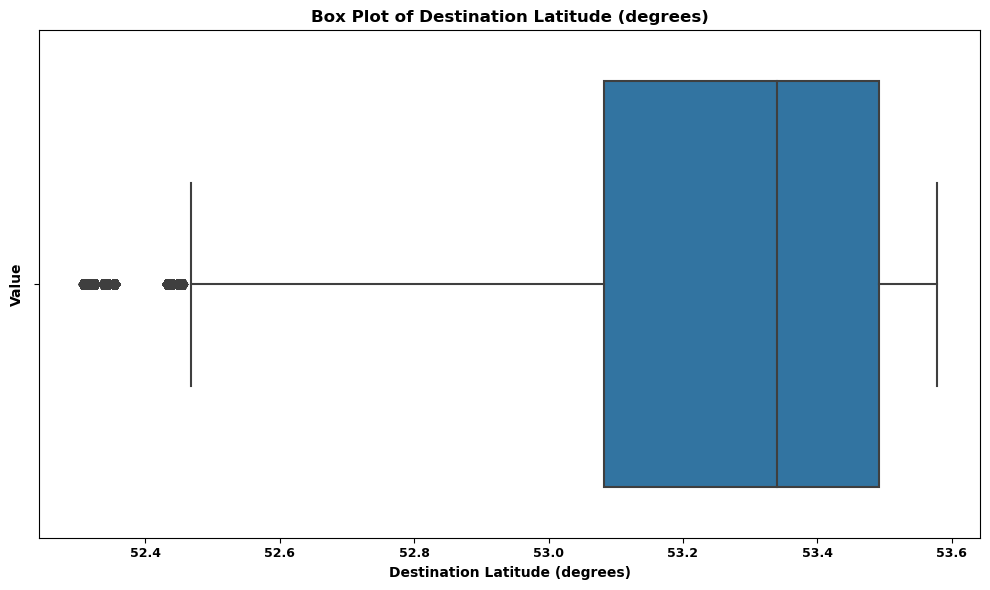

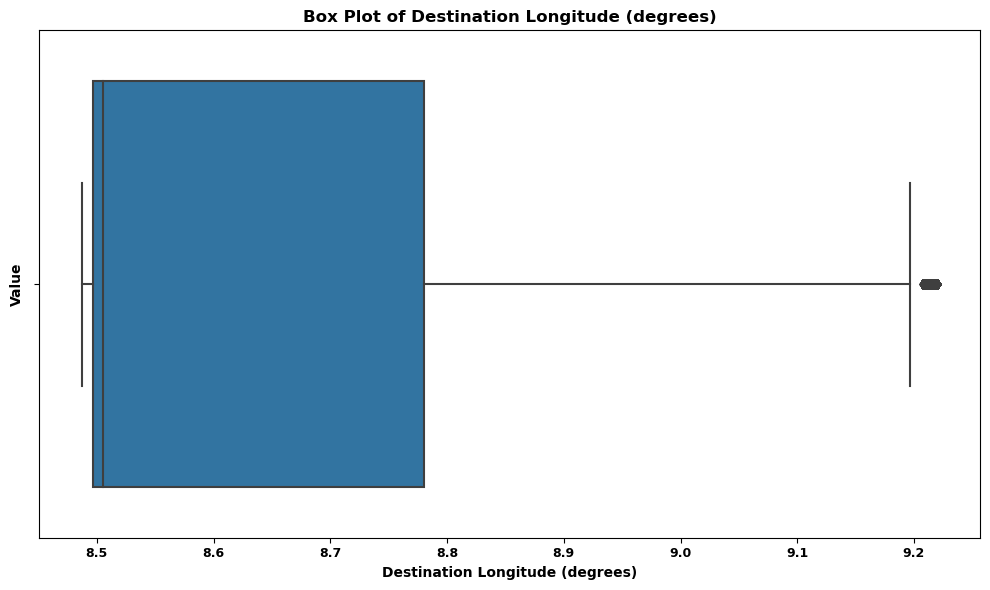

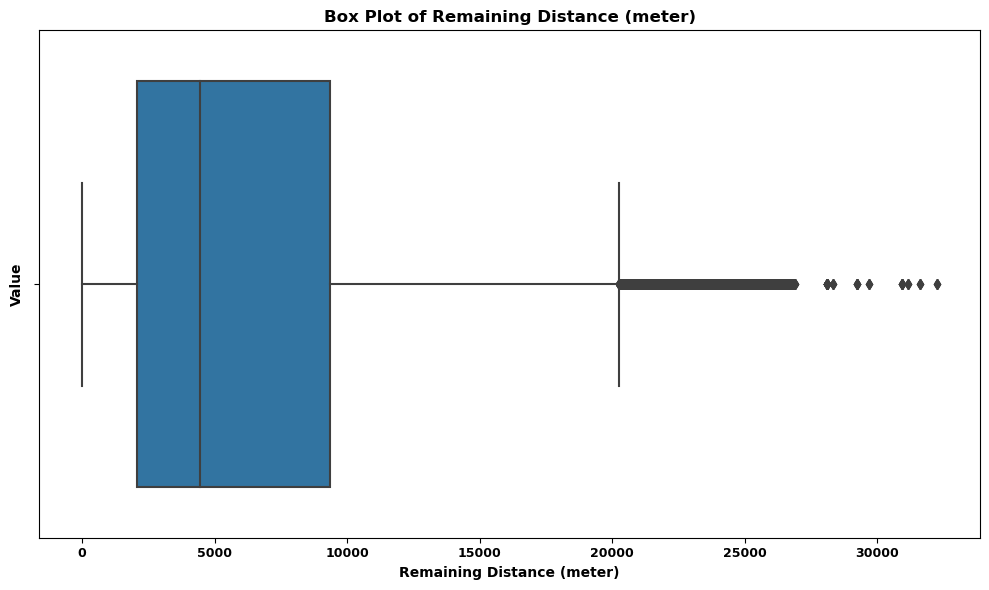

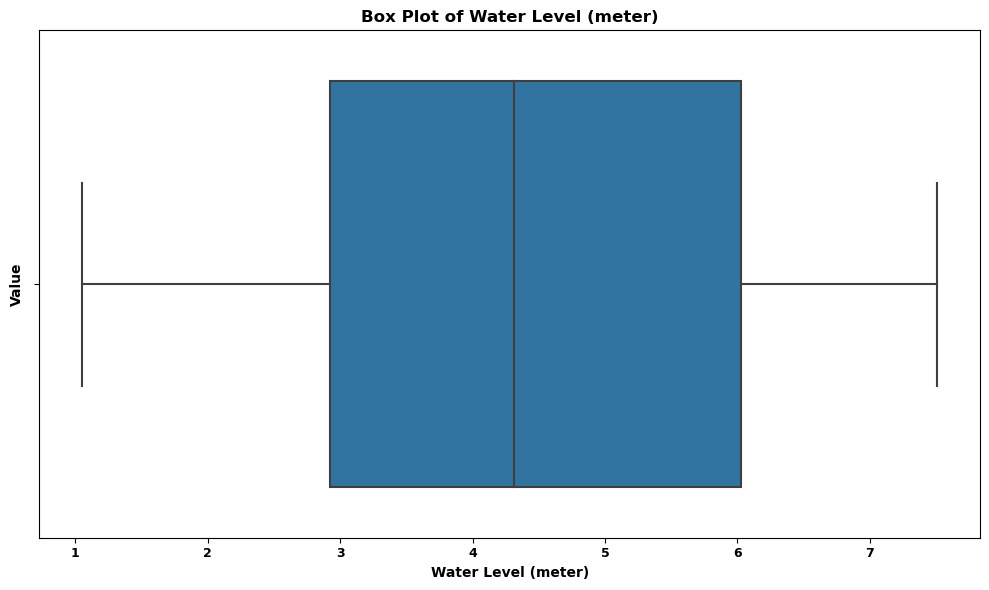

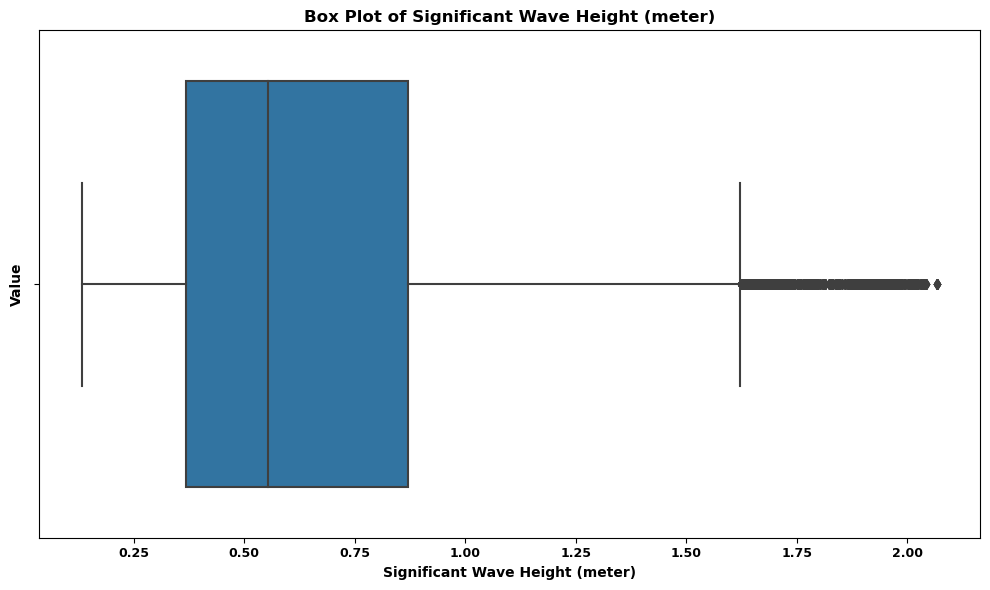

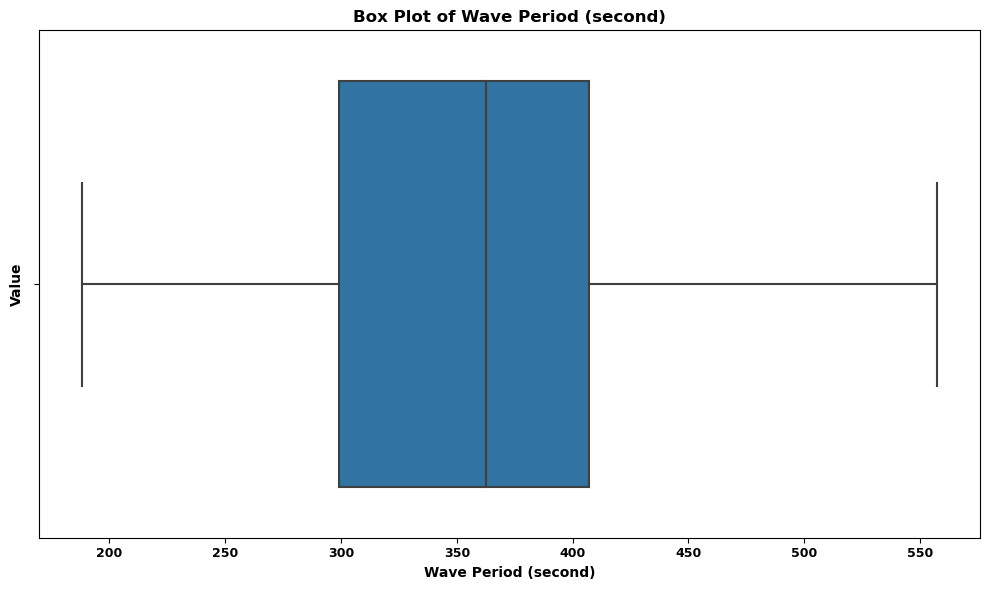

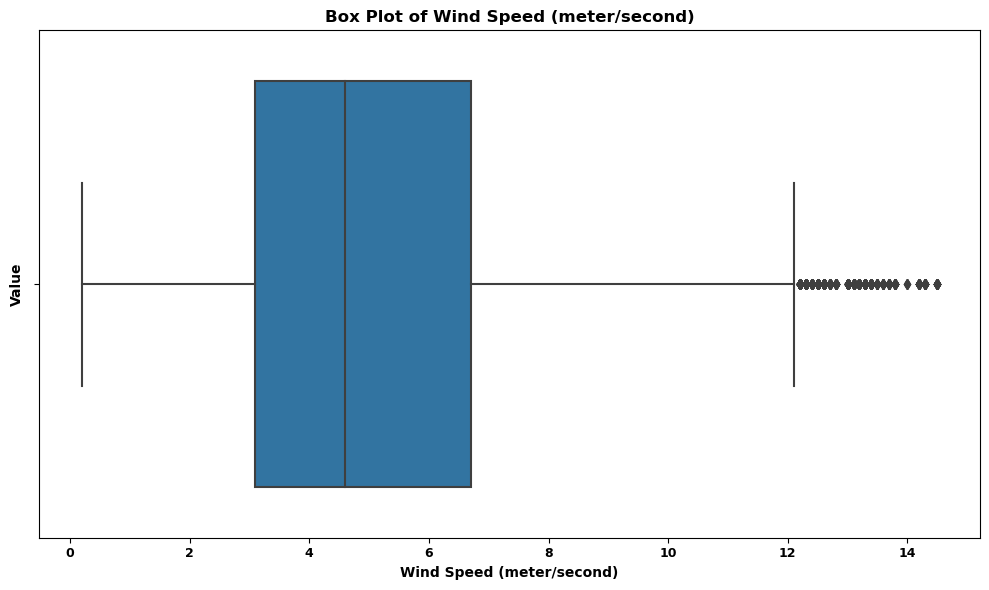

In [29]:
# Create the box plots one by one
for col in num_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=updated_df, x=col)
    plt.title(f'Box Plot of {col}', fontsize=12, fontweight='bold')  # Larger and bold title
    plt.xlabel(col, fontsize=10, fontweight='bold')  # Larger and bold x-axis label
    plt.ylabel('Value', fontsize=10, fontweight='bold')  # Larger and bold y-axis label (if applicable)
    plt.xticks(fontsize=9, fontweight='bold')  # Larger and bold x-axis tick values
    plt.yticks(fontsize=9, fontweight='bold')  # Larger and bold y-axis tick values
    plt.tight_layout()
    plt.show()

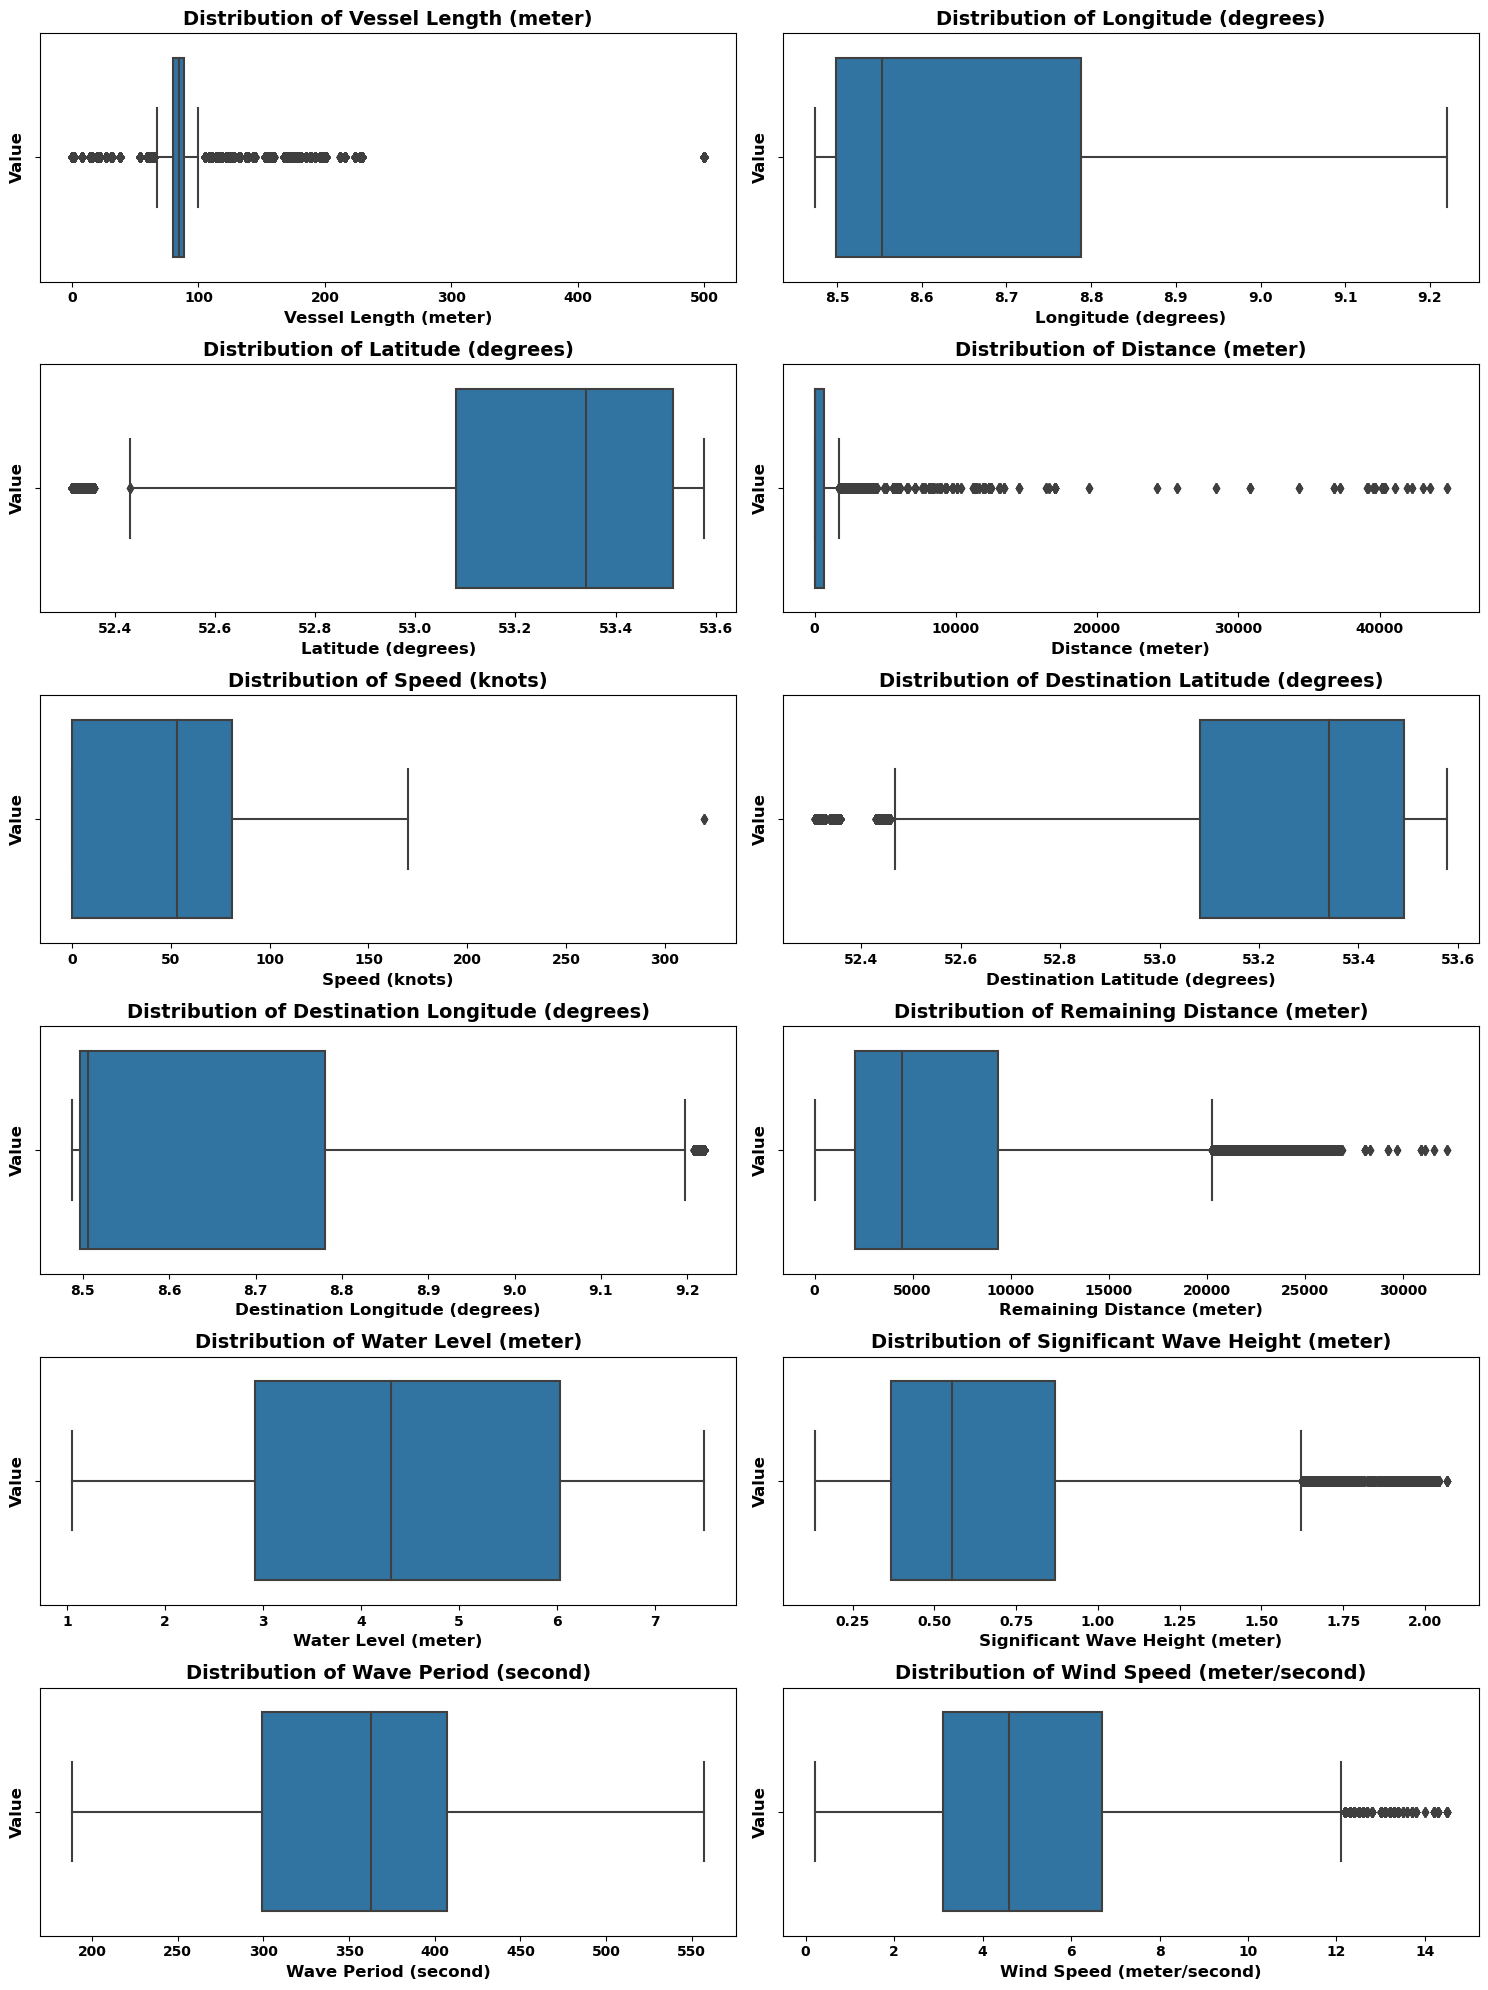

In [30]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 20))
for i, col in enumerate(num_columns):
    plt.subplot(6, 2, i + 1)  # 6x2 grid
    sns.boxplot(x=updated_df[col])  # Correct usage of sns.boxplot
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12, fontweight='bold')
    plt.ylabel('Value', fontsize=12, fontweight='bold')  # Usually, a boxplot has a 'Value' ylabel
    plt.xticks(fontsize=10, fontweight='bold')  # X-axis values
    plt.yticks(fontsize=10, fontweight='bold')  # Y-axis values
plt.tight_layout()
plt.show()